# TELCO PROJECT

# GOAL:
<div class="alert alert-success">

* Words go Here
* More Words go Here
</div>

# IMPORTS
<div class="alert alert-success">
</div>

In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# import sklearn.metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

# import environments and helper files
import wrangle as w
import QMCBT_explore_evaluate as ee
#import QMCBT_modeling as m

# set constants
α = 0.05
alpha = 0.05
np.random.seed(1992)
#random_state=1992

#import warnings
#warnings.filterwarnings("ignore")

In [2]:
# Acquire telco_churn data from Codeup SQL database
df = w.get_telco_churn_df()

# EXPLORE
<div class="alert alert-success">
    
    
</div>

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9964-WBQDJ,9965-YOKZB,9972-NKTFD,9975-GPKZU,9975-SKRNR,9979-RGMZT,9985-MWVIX,9986-BONCE,9992-UJOEL,9995-HOTOH
payment_type_id,2,2,1,1,2,4,3,4,1,2,...,4,1,3,4,2,2,2,3,2,1
contract_type_id,2,1,1,1,1,1,3,3,1,3,...,3,1,1,3,1,2,1,1,1,3
internet_service_type_id,1,1,2,2,2,1,2,2,1,1,...,3,2,1,3,3,2,2,3,1,1
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No


In [4]:
ee.explore_toc()

** CUSTOM EXPLORATION FUNCTIONS
explore_tips: PRINT A LIST OF USEFUL FUNCTIONS, METHODS, AND ATTRIBUTES USED FOR EXPLORATION
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES


In [5]:
ee.explore_tips()

** USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.describe().T
DFNAME.columns.to_list()
DFNAME.COLUMNNAME.value_counts(dropna=False)
DFNAME.dtypes
DFNAME.select_dtypes(include='object').columns
DFNAME.select_dtypes(include='float').columns
pd.crosstab(DFNAME.COLUMN-1, DFNAME.COLUMN-2)


In [6]:
# return (Row, Column)
df.shape

(7043, 44)

In [7]:
# Return non-null count and Dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   payment_type_id             7043 non-null   int64  
 2   contract_type_id            7043 non-null   int64  
 3   internet_service_type_id    7043 non-null   int64  
 4   gender                      7043 non-null   object 
 5   senior_citizen              7043 non-null   int64  
 6   partner                     7043 non-null   object 
 7   dependents                  7043 non-null   object 
 8   tenure                      7043 non-null   int64  
 9   phone_service               7043 non-null   object 
 10  multiple_lines              7043 non-null   object 
 11  online_security             7043 non-null   object 
 12  online_backup               7043 non-null   object 
 13  device_protection           7043 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
contract_type_id.1,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen.1,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
payment_type_id.1,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges.1,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [9]:
ee.nunique_column_objects(df)

customer_id has 7043 unique values.
gender has 2 unique values.
partner has 2 unique values.
dependents has 2 unique values.
phone_service has 2 unique values.
multiple_lines has 3 unique values.
online_security has 3 unique values.
online_backup has 3 unique values.
device_protection has 3 unique values.
tech_support has 3 unique values.
streaming_tv has 3 unique values.
streaming_movies has 3 unique values.
paperless_billing has 2 unique values.
total_charges has 6531 unique values.
churn has 2 unique values.
internet_service_type has 3 unique values.
contract_type has 3 unique values.
payment_type has 4 unique values.
churn_month has 1 unique values.
paperless_billing.1 has 2 unique values.
gender.1 has 2 unique values.
partner.1 has 2 unique values.
dependents.1 has 2 unique values.
total_charges.1 has 6531 unique values.
signup_date has 73 unique values.
phone_service.1 has 2 unique values.
multiple_lines.1 has 3 unique values.
online_security.1 has 3 unique values.
online_backup.

In [10]:
ee.nunique_column_qty(df)

payment_type_id has 4 unique values.
contract_type_id has 3 unique values.
internet_service_type_id has 3 unique values.
senior_citizen has 2 unique values.
tenure has 73 unique values.
monthly_charges has 1585 unique values.
contract_type_id.1 has 3 unique values.
senior_citizen.1 has 2 unique values.
payment_type_id.1 has 4 unique values.
monthly_charges.1 has 1585 unique values.
internet_service_type_id.1 has 3 unique values.


In [11]:
df.multiple_lines.unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [12]:
df.online_security.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [13]:
df.online_backup.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [14]:
df.device_protection.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [15]:
df.tech_support.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [16]:
df.streaming_tv.unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [17]:
df.streaming_movies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
df.internet_service_type.unique()

array(['DSL', 'Fiber optic', 'None'], dtype=object)

In [19]:
df.contract_type.unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [20]:
df.payment_type.unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

# PREPARE
<div class="alert alert-success">
    
    
</div>

### PREPARE To-Do List

<div class="alert alert-info">

* DROP 
    * customer_id
    * payment_type_id
    * contract_type_id
    * internet_service_type_id
    * churn_month
    * paperless_billing.1
    * gender.1 
    * partner.1 
    * dependents.1 
    * total_charges.1 
    * phone_service.1 
    * multiple_lines.1 
    * online_security.1
    * online_backup.1 
    * device_protection.1
    * tech_support.1
    * streaming_tv.1
    * streaming_movies.1
    * contract_type_id.1 
    * senior_citizen.1 
    * payment_type_id.1 
    * monthly_charges.1 
    * internet_service_type_id.1 
    
* .rename
    * NONE

* .replace
    * churn_month has nulls; replace nulls with 'active' DROP (ALL DATES DUPLICATED).
    * multiple_lines has 3 unique values. REPLACE 'No phone service' with 'No'
    * online_security has 3 unique values. REPLACE 'No internet service' with 'No'
    * online_backup has 3 unique values. REPLACE 'No internet service' with 'No'
    * device_protection has 3 unique values. REPLACE 'No internet service' with 'No'
    * tech_support has 3 unique values. REPLACE 'No internet service' with 'No'
    * streaming_tv has 3 unique values. REPLACE 'No internet service' with 'No'
    * streaming_movies has 3 unique values. REPLACE 'No internet service' with 'No'

* reformat
    * signup_date 7043 non-null   object. REFORMAT OBJECT astype DATETIME
    * total_charges contains empty " " values. REPLACE empty " " values
    * total_charges 7043 non-null   object. REFORMAT OBJECT astype FLOAT

* encode.map
    * gender has 2 unique values.
    * partner has 2 unique values.
    * dependents has 2 unique values.
    * phone_service has 2 unique values.
    * paperless_billing has 2 unique values.
    * churn has 2 unique values.
    * senior_citizen has 2 unique values.
    * multiple_lines will have 2 unique values. REPLACED 'No phone service' with 'No'
    * online_security will have 2 unique values. REPLACED 'No internet service' with 'No'
    * online_backup will have 2 unique values. REPLACED 'No internet service' with 'No'
    * device_protection will have 2 unique values. REPLACED 'No internet service' with 'No'
    * tech_support will have 2 unique values. REPLACED 'No internet service' with 'No'
    * streaming_tv will have 2 unique values. REPLACED 'No internet service' with 'No'
    * streaming_movies will have 2 unique values. REPLACED 'No internet service' with 'No'

* melt
    * NONE

* pivot
    * internet_service_type has 3 unique values.
    * contract_type has 3 unique values.
    * payment_type has 4 unique values.  

* feature engineer
    * NONE

* Impute
    * NONE

* Drop encoded.map columns
    * gender
    * partner
    * dependents
    * phone_service
    * paperless_billing
    * churn
    * multiple_lines
    * online_security
    * online_backup
    * device_protection
    * tech_support
    * streaming_tv
    * streaming_movies

* Drop pivot columns
    * internet_service_type 
    * contract_type 
    * payment_type

* Rename encoded.map columns to drop "_encoded"
    * gender_encoded':'gender',
    * partner_encoded':'partner',
    * dependents_encoded':'dependents',
    * phone_service_encoded':'phone_service',
    * paperless_billing_encoded':'paperless_billing',
    * churn_encoded':'churn',
    * multiple_lines_encoded':'multiple_lines',
    * online_security_encoded':'online_security',
    * online_backup_encoded':'online_backup',
    * device_protection_encoded':'device_protection',
    * tech_support_encoded':'tech_support',
    * streaming_tv_encoded':'streaming_tv',
    * streaming_movies_encoded':'streaming_movies'}
    
</div>

# DROP
<div class="alert alert-warning">

* customer_id
* payment_type_id
* contract_type_id
* internet_service_type_id
* churn_month
* paperless_billing.1
* gender.1 
* partner.1 
* dependents.1 
* total_charges.1 
* phone_service.1 
* multiple_lines.1 
* online_security.1
* online_backup.1 
* device_protection.1
* tech_support.1
* streaming_tv.1
* streaming_movies.1
* contract_type_id.1 
* senior_citizen.1 
* payment_type_id.1 
* monthly_charges.1 
* internet_service_type_id.1 
    
</div>

In [21]:
df = df.drop(columns=['customer_id',
             'payment_type_id',
             'contract_type_id',
             'internet_service_type_id',
             'churn_month',
             'paperless_billing.1',
             'gender.1', 
             'partner.1', 
             'dependents.1', 
             'total_charges.1', 
             'phone_service.1', 
             'multiple_lines.1', 
             'online_security.1',
             'online_backup.1', 
             'device_protection.1',
             'tech_support.1',
             'streaming_tv.1',
             'streaming_movies.1',
             'contract_type_id.1', 
             'senior_citizen.1', 
             'payment_type_id.1', 
             'monthly_charges.1', 
             'internet_service_type_id.1'
            ])

In [22]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No internet service,No internet service,No,No,No internet service,No,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No,No,Yes,...,No internet service,No,Yes,No internet service,No internet service,Yes,No,No internet service,Yes,Yes
device_protection,No,No,Yes,Yes,No,No,Yes,No,No,Yes,...,No internet service,No,No,No internet service,No internet service,No,No,No internet service,No,Yes


# REPLACE
<div class="alert alert-warning">
    
* churn_month has nulls; replace nulls with 'active' DROP (ALL DATES DUPLICATED).
* multiple_lines has 3 unique values. REPLACE 'No phone service' with 'No'
* online_security has 3 unique values. REPLACE 'No internet service' with 'No'
* online_backup has 3 unique values. REPLACE 'No internet service' with 'No'
* device_protection has 3 unique values. REPLACE 'No internet service' with 'No'
* tech_support has 3 unique values. REPLACE 'No internet service' with 'No'
* streaming_tv has 3 unique values. REPLACE 'No internet service' with 'No'
* streaming_movies has 3 unique values. REPLACE 'No internet service' with 'No'
    
</div>

In [23]:
df.multiple_lines = df.multiple_lines.replace('No phone service', 'No')

df.online_security = df.online_security.replace('No internet service', 'No')
df.online_backup = df.online_backup.replace('No internet service', 'No')
df.device_protection = df.device_protection.replace('No internet service', 'No')
df.tech_support = df.tech_support.replace('No internet service', 'No')
df.streaming_tv = df.streaming_tv.replace('No internet service', 'No')
df.streaming_movies = df.streaming_movies.replace('No internet service', 'No')

In [24]:
df.multiple_lines.unique() 

array(['No', 'Yes'], dtype=object)

In [25]:
df.online_security.unique()  

array(['No', 'Yes'], dtype=object)

In [26]:
df.online_backup.unique()  

array(['Yes', 'No'], dtype=object)

In [27]:
df.device_protection.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df.tech_support.unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df.streaming_tv.unique()

array(['Yes', 'No'], dtype=object)

In [30]:
df.streaming_movies.unique()

array(['No', 'Yes'], dtype=object)

# ENCODE.MAP
<div class="alert alert-warning">
    
* gender has 2 unique values.
* partner has 2 unique values.
* dependents has 2 unique values.
* phone_service has 2 unique values.
* paperless_billing has 2 unique values.
* churn has 2 unique values.
* multiple_lines will have 2 unique values. REPLACED 'No phone service' with 'No'
* online_security will have 2 unique values. REPLACED 'No internet service' with 'No'
* online_backup will have 2 unique values. REPLACED 'No internet service' with 'No'
* device_protection will have 2 unique values. REPLACED 'No internet service' with 'No'
* tech_support will have 2 unique values. REPLACED 'No internet service' with 'No'
* streaming_tv will have 2 unique values. REPLACED 'No internet service' with 'No'
* streaming_movies will have 2 unique values. REPLACED 'No internet service' with 'No'
    
</div>

In [31]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [32]:
df.partner.unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df.dependents.unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df.phone_service.unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df.paperless_billing.unique()

array(['Yes', 'No'], dtype=object)

In [36]:
df.churn.unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df.senior_citizen.unique()

array([0, 1])

In [38]:
df.multiple_lines.unique()

array(['No', 'Yes'], dtype=object)

In [39]:
df.online_security.unique()

array(['No', 'Yes'], dtype=object)

In [40]:
df.online_backup.unique()

array(['Yes', 'No'], dtype=object)

In [41]:
df.device_protection.unique()

array(['No', 'Yes'], dtype=object)

In [42]:
df.tech_support.unique()

array(['Yes', 'No'], dtype=object)

In [43]:
df.streaming_tv.unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df.streaming_movies.unique()

array(['No', 'Yes'], dtype=object)

In [45]:
encoded_df = pd.DataFrame()
encoded_df['gender_encoded'] = df.gender.map({'Male': 1, 'Female': 0})
encoded_df['partner_encoded'] = df.partner.map({'Yes': 1, 'No': 0})
encoded_df['dependents_encoded'] = df.dependents.map({'Yes': 1, 'No': 0})
encoded_df['phone_service_encoded'] = df.phone_service.map({'Yes': 1, 'No': 0})
encoded_df['paperless_billing_encoded'] = df.paperless_billing.map({'Yes': 1, 'No': 0})
encoded_df['churn_encoded'] = df.churn.map({'Yes': 1, 'No': 0})
encoded_df['multiple_lines_encoded'] = df.multiple_lines.map({'Yes': 1, 'No': 0})
encoded_df['online_security_encoded'] = df.online_security.map({'Yes': 1, 'No': 0})
encoded_df['online_backup_encoded'] = df.online_backup.map({'Yes': 1, 'No': 0})
encoded_df['device_protection_encoded'] = df.device_protection.map({'Yes': 1, 'No': 0})
encoded_df['tech_support_encoded'] = df.tech_support.map({'Yes': 1, 'No': 0})
encoded_df['streaming_tv_encoded'] = df.streaming_tv.map({'Yes': 1, 'No': 0})
encoded_df['streaming_movies_encoded'] = df.streaming_movies.map({'Yes': 1, 'No': 0})
encoded_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender_encoded,0,1,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,1
partner_encoded,1,0,0,1,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
dependents_encoded,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
phone_service_encoded,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
paperless_billing_encoded,1,0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0
churn_encoded,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
multiple_lines_encoded,0,1,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
online_security_encoded,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
online_backup_encoded,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,1
device_protection_encoded,0,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [46]:
ee.nunique_column_all(df)

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No     4072
Yes    2971
Name: multiple_lines, dtype: int64

No     5024
Yes    2019
Name: online_security, dtype: int64

No     4614
Yes    2429
Name: online_backup, dtype: int64

No     4621
Yes    2422
Name: device_protection, dtype: int64

No     4999
Yes    2044
Name: tech_support, dtype: int64

No     4336
Yes    2707
Name: streaming_tv, dtype: int64

No     4311
Yes    2732
Name: streaming_movies, dtype: int64

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

20.05    61
19.85    45
19.95    44
19.90    44
20.00    43
         ..
97.45     1


In [47]:
ee.nunique_column_all(encoded_df)

1    3555
0    3488
Name: gender_encoded, dtype: int64

0    3641
1    3402
Name: partner_encoded, dtype: int64

0    4933
1    2110
Name: dependents_encoded, dtype: int64

1    6361
0     682
Name: phone_service_encoded, dtype: int64

1    4171
0    2872
Name: paperless_billing_encoded, dtype: int64

0    5174
1    1869
Name: churn_encoded, dtype: int64

0    4072
1    2971
Name: multiple_lines_encoded, dtype: int64

0    5024
1    2019
Name: online_security_encoded, dtype: int64

0    4614
1    2429
Name: online_backup_encoded, dtype: int64

0    4621
1    2422
Name: device_protection_encoded, dtype: int64

0    4999
1    2044
Name: tech_support_encoded, dtype: int64

0    4336
1    2707
Name: streaming_tv_encoded, dtype: int64

0    4311
1    2732
Name: streaming_movies_encoded, dtype: int64



# PIVOT
<div class="alert alert-warning">
    
* internet_service_type has 3 unique values.
* contract_type has 3 unique values.
* payment_type has 4 unique values.

</div>

In [48]:
# Use pandas dummies to pivot features with more than two string values
# into multiple columns with binary int values that can be read as boolean
# drop_first = False in draft for human readability; Final will have it set to True.

dummy_df = pd.get_dummies(data=df[['internet_service_type', 'contract_type', 'payment_type']], drop_first=False)
dummy_df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
internet_service_type_DSL,1,1,0,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,1,1
internet_service_type_Fiber optic,0,0,1,1,1,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
internet_service_type_None,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
contract_type_Month-to-month,0,1,1,1,1,1,0,0,1,0,...,0,1,1,0,1,0,1,1,1,0
contract_type_One year,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
contract_type_Two year,0,0,0,0,0,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
payment_type_Bank transfer (automatic),0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
payment_type_Credit card (automatic),0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
payment_type_Electronic check,0,0,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
payment_type_Mailed check,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,0


In [49]:
ee.nunique_column_all(dummy_df)

0    4622
1    2421
Name: internet_service_type_DSL, dtype: int64

0    3947
1    3096
Name: internet_service_type_Fiber optic, dtype: int64

0    5517
1    1526
Name: internet_service_type_None, dtype: int64

1    3875
0    3168
Name: contract_type_Month-to-month, dtype: int64

0    5570
1    1473
Name: contract_type_One year, dtype: int64

0    5348
1    1695
Name: contract_type_Two year, dtype: int64

0    5499
1    1544
Name: payment_type_Bank transfer (automatic), dtype: int64

0    5521
1    1522
Name: payment_type_Credit card (automatic), dtype: int64

0    4678
1    2365
Name: payment_type_Electronic check, dtype: int64

0    5431
1    1612
Name: payment_type_Mailed check, dtype: int64



In [50]:
df = pd.concat([df, encoded_df, dummy_df], axis=1)

In [51]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Female,Male,Female,Male,Male,Female,Female,Female,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,Yes,No,No,Yes,No,No,No,No,No,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,No,No,Yes,No,No,No,No,No,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,No,No,No
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No,No,No,No,No,No,No,No,No,Yes
online_backup,Yes,No,No,Yes,No,No,Yes,No,No,Yes,...,No,No,Yes,No,No,Yes,No,No,Yes,Yes
device_protection,No,No,Yes,Yes,No,No,Yes,No,No,Yes,...,No,No,No,No,No,No,No,No,No,Yes


### DROP and RENAME
<div class="alert alert-warning">
</div>

In [52]:
# Drop encoded.map columns
df = df.drop(columns=['gender',
                      'partner',
                      'dependents',
                      'phone_service',
                      'paperless_billing',
                      'churn',
                      'multiple_lines',
                      'online_security',
                      'online_backup',
                      'device_protection',
                      'tech_support',
                      'streaming_tv',
                      'streaming_movies'])

# Drop pivot columns
df = df.drop(columns=['internet_service_type', 
                      'contract_type', 
                      'payment_type'])

# Rename encoded.map columns
df.rename(columns = {'gender_encoded':'gender',
                     'partner_encoded':'partner',
                     'dependents_encoded':'dependents',
                     'phone_service_encoded':'phone_service',
                     'paperless_billing_encoded':'paperless_billing',
                     'churn_encoded':'churn',
                     'multiple_lines_encoded':'multiple_lines',
                     'online_security_encoded':'online_security',
                     'online_backup_encoded':'online_backup',
                     'device_protection_encoded':'device_protection',
                     'tech_support_encoded':'tech_support',
                     'streaming_tv_encoded':'streaming_tv',
                     'streaming_movies_encoded':'streaming_movies'}
          , inplace = True)

In [53]:
ee.nunique_column_all(df)

0    5901
1    1142
Name: senior_citizen, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

20.05    61
19.85    45
19.95    44
19.90    44
20.00    43
         ..
97.45     1
92.10     1
51.60     1
78.25     1
91.75     1
Name: monthly_charges, Length: 1585, dtype: int64

20.2       11
           11
19.75       9
19.9        8
19.65       8
           ..
985.05      1
1396        1
435         1
3720.35     1
3707.6      1
Name: total_charges, Length: 6531, dtype: int64

2021-12-21 18:07:34    613
2016-01-21 18:07:34    362
2021-11-21 18:07:34    238
2021-10-21 18:07:34    200
2021-09-21 18:07:34    176
                      ... 
2019-09-21 18:07:34     57
2018-10-21 18:07:34     56
2018-05-21 18:07:34     51
2019-01-21 18:07:34     50
2022-01-21 18:07:34     11
Name: signup_date, Length: 73, dtype: int64

1    3555
0    3488
Name: gender, dtype: int64

0    3641
1    340

In [54]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
tenure,9,9,4,13,3,9,71,63,7,65,...,71,9,28,46,1,7,1,4,2,63
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,24.4,83.85,54.65,19.75,18.9,94.05,70.15,20.95,50.3,59.0
total_charges,593.3,542.4,280.85,1237.85,267.4,571.45,7904.25,5377.8,340.35,5957.9,...,1725.4,790.15,1517.5,856.5,18.9,633.45,70.15,85.5,92.75,3707.6
signup_date,2021-04-21 18:07:34,2021-04-21 18:07:34,2021-09-21 18:07:34,2020-12-21 18:07:34,2021-10-21 18:07:34,2021-04-21 18:07:34,2016-02-21 18:07:34,2016-10-21 18:07:34,2021-06-21 18:07:34,2016-08-21 18:07:34,...,2016-02-21 18:07:34,2021-04-21 18:07:34,2019-09-21 18:07:34,2018-03-21 18:07:34,2021-12-21 18:07:34,2021-06-21 18:07:34,2021-12-21 18:07:34,2021-09-21 18:07:34,2021-11-21 18:07:34,2016-10-21 18:07:34
gender,0,1,1,1,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,1
partner,1,0,0,1,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
dependents,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
phone_service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
paperless_billing,1,0,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,0,1,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   tenure                                  7043 non-null   int64  
 2   monthly_charges                         7043 non-null   float64
 3   total_charges                           7043 non-null   object 
 4   signup_date                             7043 non-null   object 
 5   gender                                  7043 non-null   int64  
 6   partner                                 7043 non-null   int64  
 7   dependents                              7043 non-null   int64  
 8   phone_service                           7043 non-null   int64  
 9   paperless_billing                       7043 non-null   int64  
 10  churn                                   7043 non-null   int6

In [56]:
df.total_charges.info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 368.1+ KB


In [57]:
df.total_charges = df.total_charges.replace(' ', '0')

In [58]:
#df['total_charges'] = df['total_charges'].astype(float)
#df.total_charges = df.total_charges.astype(float)
df['total_charges'] = pd.to_numeric(df['total_charges'])

In [59]:
df.total_charges.info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 368.1 KB


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7043 non-null   int64  
 1   tenure                                  7043 non-null   int64  
 2   monthly_charges                         7043 non-null   float64
 3   total_charges                           7043 non-null   float64
 4   signup_date                             7043 non-null   object 
 5   gender                                  7043 non-null   int64  
 6   partner                                 7043 non-null   int64  
 7   dependents                              7043 non-null   int64  
 8   phone_service                           7043 non-null   int64  
 9   paperless_billing                       7043 non-null   int64  
 10  churn                                   7043 non-null   int6

In [61]:
df["signup_date"] = pd.to_datetime(df["signup_date"])

In [62]:
df.signup_date.info()

<class 'pandas.core.series.Series'>
Int64Index: 7043 entries, 0 to 7042
Series name: signup_date
Non-Null Count  Dtype         
--------------  -----         
7043 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 368.1 KB


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   senior_citizen                          7043 non-null   int64         
 1   tenure                                  7043 non-null   int64         
 2   monthly_charges                         7043 non-null   float64       
 3   total_charges                           7043 non-null   float64       
 4   signup_date                             7043 non-null   datetime64[ns]
 5   gender                                  7043 non-null   int64         
 6   partner                                 7043 non-null   int64         
 7   dependents                              7043 non-null   int64         
 8   phone_service                           7043 non-null   int64         
 9   paperless_billing                       7043 non-nul

# Data Dictionary
<div class="alert alert-success">

| Feature | Definition |
|:--------|:-----------|
|Rated| True or False, The game's result is reflected in each player's rating|
|Winning Pieces| The color of pieces the winning player was moving|
|White Rating| Rating of the player moving the white pieces using the Glicko-2 rating method for games played on Lichess|
|Black Rating| Rating of the player moving the white pieces using the Glicko-2 rating method for games played on Lichess|
|Rating Difference| The difference in rating between the players in the game|
|Game Rating| The average rating of the two players in the game|
|Lower Rated White| True or False, The lower rated player is moving the white pieces|
|Opening Name| The name of the opening played in the game|
|Time Control Group| The amount of time allotted to each player to make their moves, **Standard** (60 min or more), **Rapid** (30 - 15 min), **Blitz** (5 - 3 min), or **Bullet** (2 or less), **Other** (any other time limit)|
|Upset (Target)| True or False, The lower rated player won the game|
|Additional Features|Encoded and values for categorical data and scaled versions continuous data|

</div>

In [64]:
df.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'signup_date', 'gender', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

# SPLIT  
<div class="alert alert-success">
    
    
    
</div>

In [65]:
# use predefined function to split data for train, validate, and test
target = 'churn'
train_df, validate_df, test_df = w.split(df, target)

_______________________________________________________________
|                              DF                             |
|-------------------|-------------------|---------------------|
|       Train       |       Validate    |          Test       |
|-------------------|-------------------|-----------|---------|
| x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |
|-------------------------------------------------------------|

* 1. tree_1 = DecisionTreeClassifier(max_depth = 5)
* 2. tree_1.fit(x_train, y_train)
* 3. predictions = tree_1.predict(x_train)
* 4. pd.crosstab(y_train, predictions)
* 5. val_predictions = tree_1.predict(x_val)
* 6. pd.crosstab(y_val, val_predictions)

Prepared df: (7043, 28)

Train (train_df): (4225, 28)
Validate (validate_df): (1409, 28)
Test (test_df): (1409, 28)


# VISUALIZATION
<div class="alert alert-sucess">
    
    
    
</div>

In [66]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
tenure,44,14,14,23,51,53,69,5,64,13,...,52,30,24,3,57,5,52,4,35,10
monthly_charges,109.8,55.7,100.55,20.15,87.55,100.3,104.05,70.05,81.05,84.6,...,94.6,83.55,66.3,20.85,101.3,90.8,50.5,70.2,55.25,91.1
total_charges,4860.35,795.15,1415.55,405.6,4475.9,5200.8,7262.0,346.4,5135.35,1115.2,...,5025.8,2570.2,1559.45,72.0,5779.6,455.5,2566.3,237.95,1924.1,964.35
signup_date,2018-05-21 18:07:34,2020-11-21 18:07:34,2020-11-21 18:07:34,2020-02-21 18:07:34,2017-10-21 18:07:34,2017-08-21 18:07:34,2016-04-21 18:07:34,2021-08-21 18:07:34,2016-09-21 18:07:34,2020-12-21 18:07:34,...,2017-09-21 18:07:34,2019-07-21 18:07:34,2020-01-21 18:07:34,2021-10-21 18:07:34,2017-04-21 18:07:34,2021-08-21 18:07:34,2017-09-21 18:07:34,2021-09-21 18:07:34,2019-02-21 18:07:34,2021-03-21 18:07:34
gender,0,0,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,1,0
partner,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0
dependents,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
phone_service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
paperless_billing,1,0,1,0,0,1,1,1,0,1,...,0,1,0,0,0,1,1,1,0,1


In [67]:
float_cols = train_df.select_dtypes(include='float').columns
float_cols

Index(['monthly_charges', 'total_charges'], dtype='object')

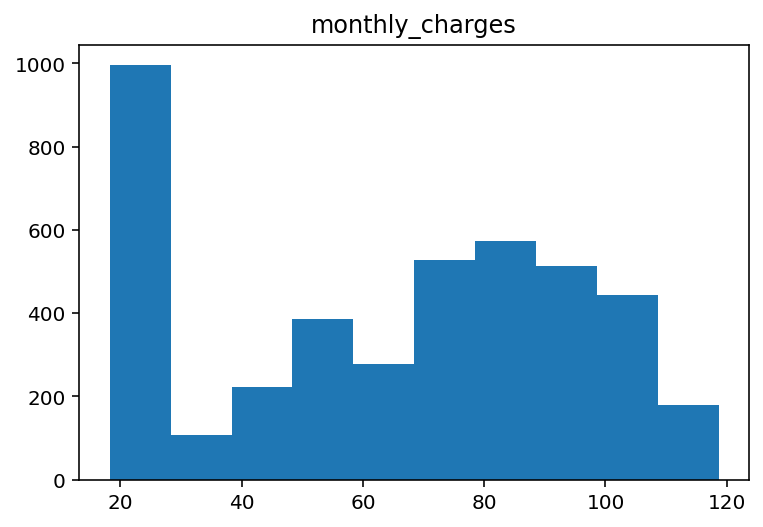

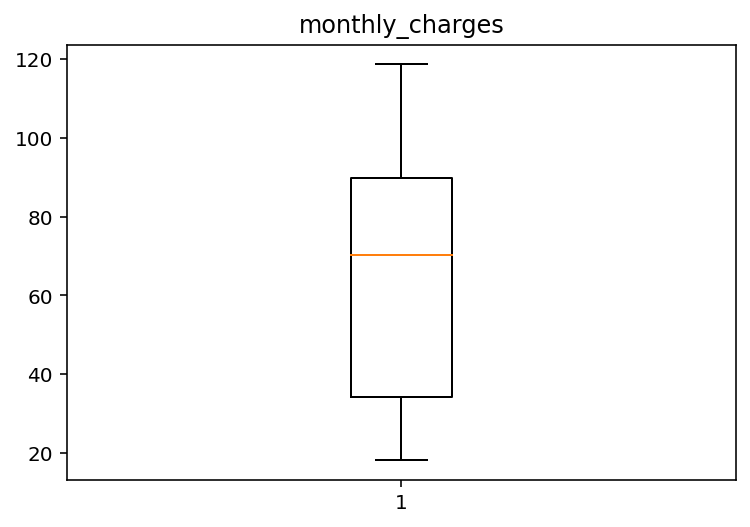

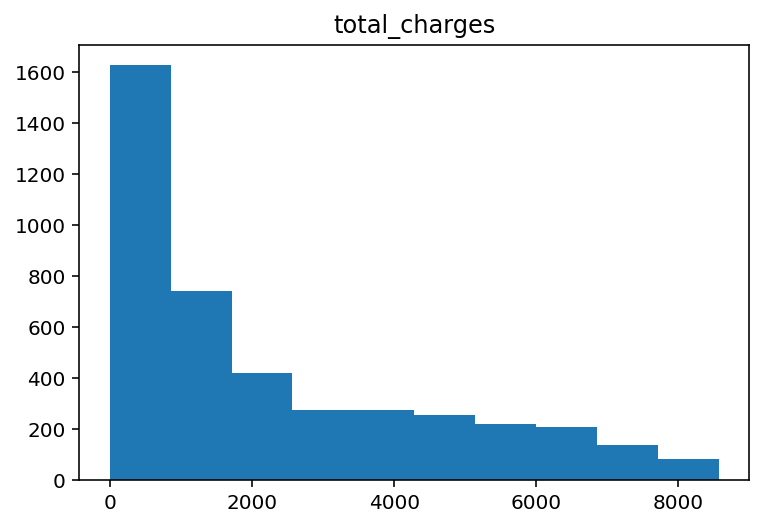

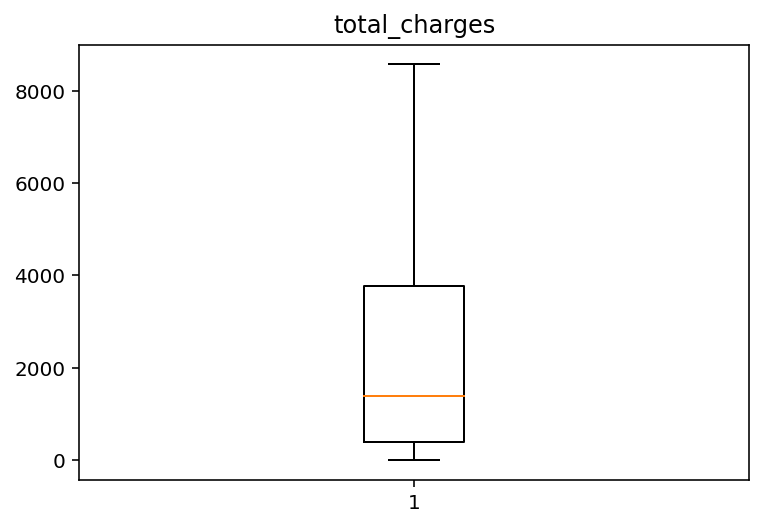

In [68]:
# Plot numeric columns
for col in float_cols:
    plt.hist(train_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train_df[col])
    plt.title(col)
    plt.show()

In [69]:
train_df.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

(array([5174.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1869.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

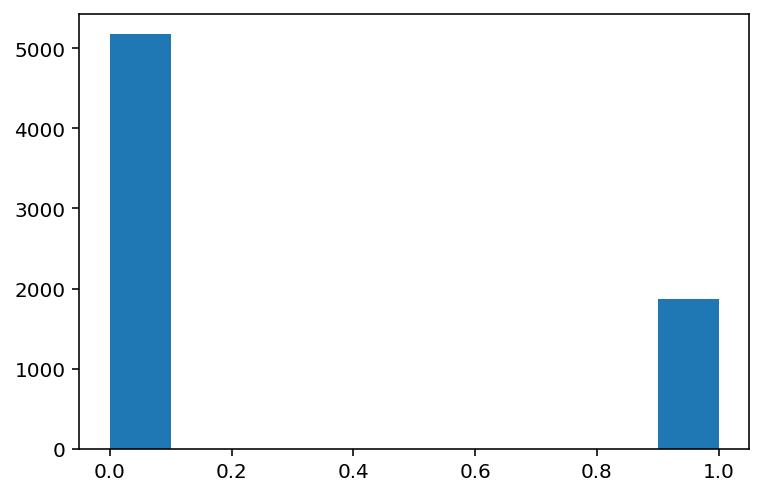

In [70]:
plt.hist(df.churn)

(array([675., 286., 303., 268., 263., 303., 339., 357., 458., 973.]),
 array([16821.75525463, 17040.95525463, 17260.15525463, 17479.35525463,
        17698.55525463, 17917.75525463, 18136.95525463, 18356.15525463,
        18575.35525463, 18794.55525463, 19013.75525463]),
 <BarContainer object of 10 artists>)

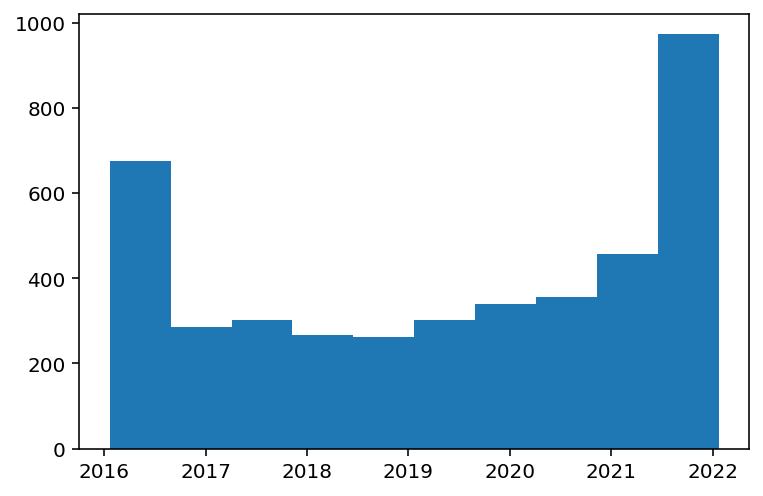

In [71]:
plt.hist(train_df.signup_date)

In [72]:
churn = train_df[train_df['churn'] == 1]
active = train_df[train_df['churn'] == 0]

In [73]:
train_df.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'signup_date', 'gender', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

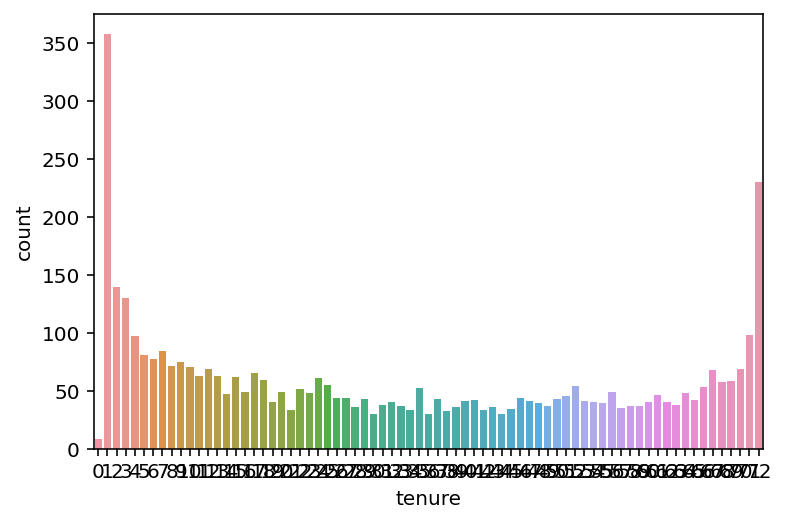

In [74]:
# count plot on single categorical variable
sns.countplot(x ='tenure', data = train_df)
 
# Show the plot
plt.show()

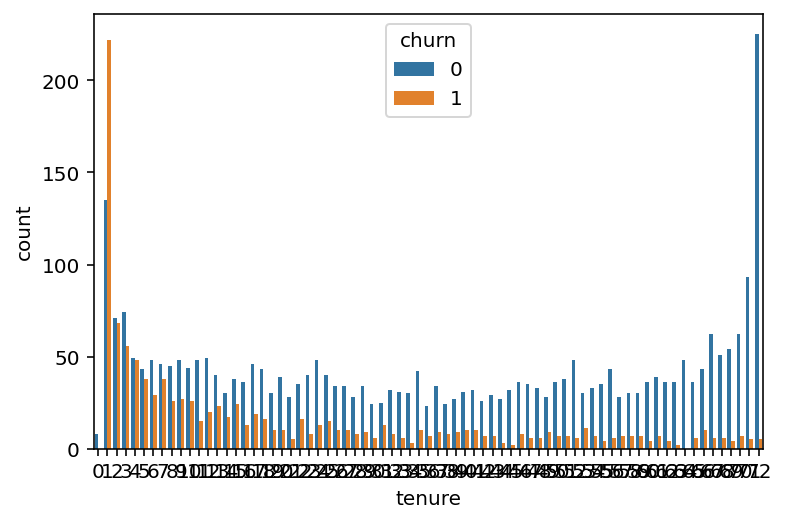

In [75]:
# count plot on two categorical variable
sns.countplot(x ='tenure', hue = "churn", data = train_df)#, palette = "Set2")
 
# Show the plot
plt.show()

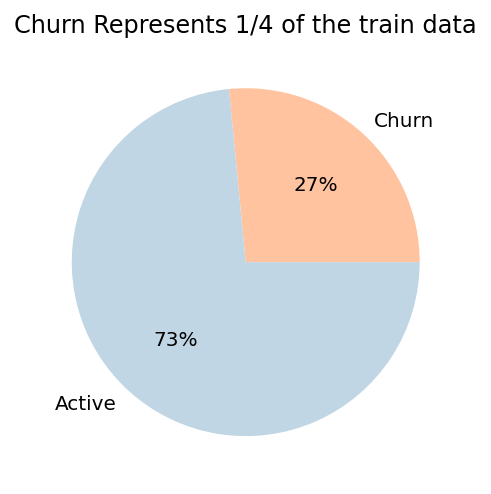

In [204]:
# set values and labels for chart
values = [len(train_df.churn[train_df.churn == 1]), 
          len(train_df.churn[train_df.churn == 0])] 
labels = ['Churn','Active', ] 

# generate and show chart
plt.pie(values, 
        labels=labels, 
        autopct='%.0f%%', 
        colors=['#ffc3a0', '#c0d6e4'])

plt.title('Churn Represents 1/4 of the train data')
plt.show()

<AxesSubplot:ylabel='tenure'>

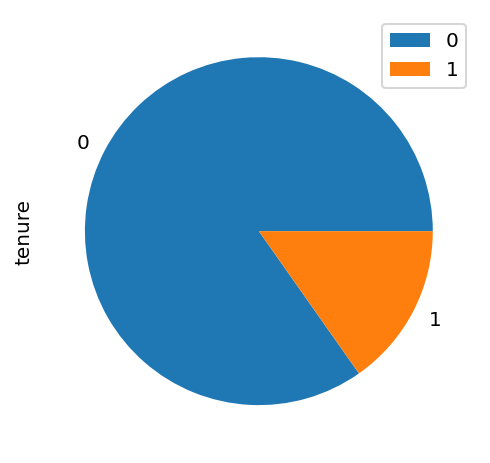

In [201]:
# Plotting the pie chart for above dataframe
train_df.groupby(['churn']).sum().plot(kind='pie', y='tenure')

* There appears to be a significant relationship that those with more tenure are less likely to churn.

In [77]:
tech_churn = pd.pivot_table(train_df, 
                        index=[], 
                          columns=['tech_support'], 
                          values=['churn'], 
                          aggfunc='count')
tech_churn 

tech_support,0,1
churn,3038,1187


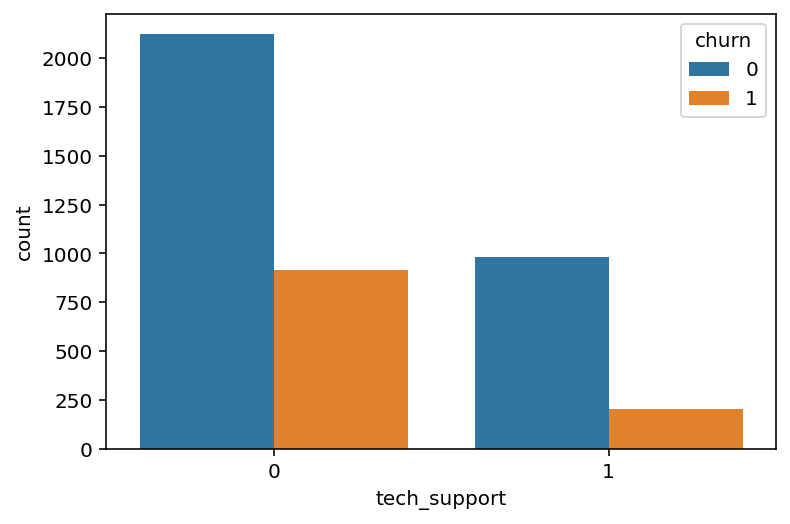

In [78]:
# count plot on two categorical variable
sns.countplot(x ='tech_support', hue = 'churn', data = train_df)#, palette = "Set2")
 
# Show the plot
plt.show()

* Those with Tech Support Churn less than those without

In [79]:
tech_churn = pd.pivot_table(train_df, 
                        index=[], 
                          columns=['churn'], 
                          values=['tech_support'], 
                          aggfunc='count')
tech_churn 

churn,0,1
tech_support,3104,1121


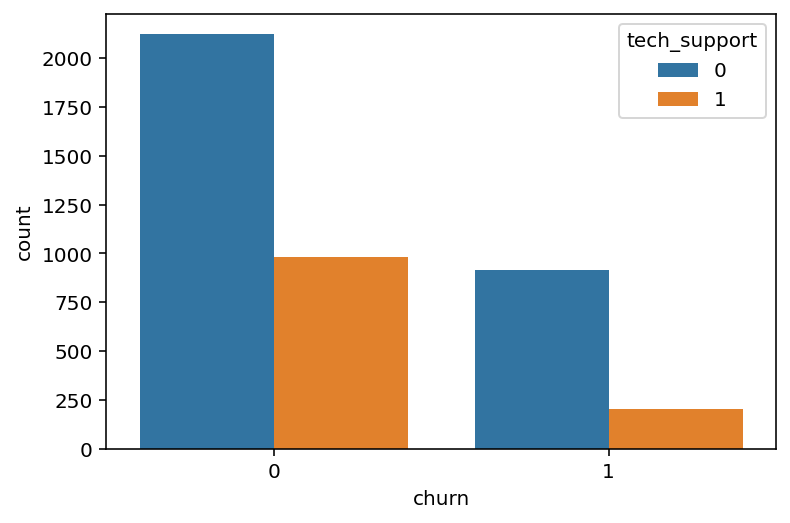

In [80]:
# count plot on two categorical variable
sns.countplot(x ='churn', hue = 'tech_support', data = train_df)#, palette = "Set2")
 
# Show the plot
plt.show()

* The majority of customers that churn do not have tech support

In [219]:
def get_dbl_pies(train_df):
    """
    Create two pie charts showing churn percentage
    for having and not having tech support
    """

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(train_df.churn[(train_df.tech_support == 1) &
                                 (train_df.churn == 1)]),
            len(train_df.churn[(train_df.tech_support == 1) &
                               (train_df.churn == 0)])]
    
    labels = ['Churn', 'Active']

    ax1.pie(values, 
            labels=labels, 
            autopct='%.0f%%', 
            colors=['#ffc3a0', '#c0d6e4'])
    
    ax1.title.set_text('Tech Support')

    # create pie chart and and assign to axis object
    values = [len(train_df.churn[(train_df.tech_support == 0) &
                                 (train_df.churn == 1)]),
            len(train_df.churn[(train_df.tech_support == 0) & 
                               (train_df.churn == 0)])]
    
    labels = ['Churn', 'Active'] 

    ax2.pie(values, 
            labels=labels, 
            autopct='%.0f%%', 
            colors=['#ffc3a0', '#c0d6e4'])
    
    ax2.title.set_text('No Tech Support')

    # display charts
    plt.tight_layout()
    plt.show()

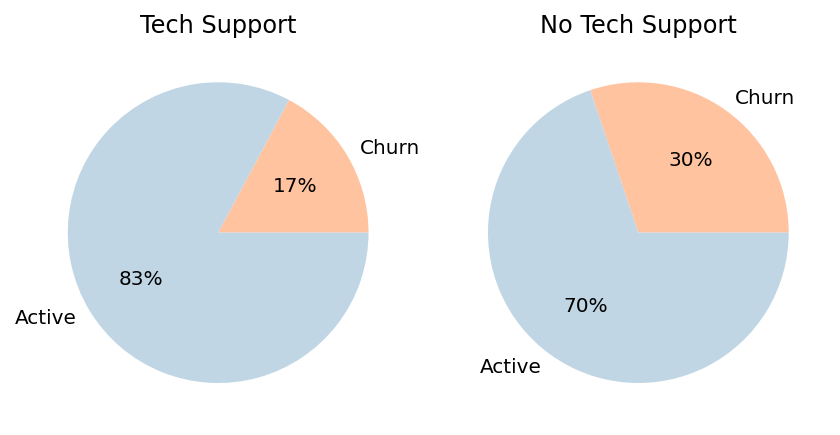

In [220]:
get_dbl_pies(train_df)

In [221]:
def get_dbl_pies(train_df):
    """
    Create two pie charts showing churn percentage
    for having and not having tech support
    """

    # create axis object
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    # create pie chart and assign to axis object
    values = [len(train_df.tech_support[(train_df.churn == 1) &
                                 (train_df.tech_support == 1)]),
            len(train_df.tech_support[(train_df.churn == 1) &
                               (train_df.tech_support == 0)])]
    
    labels = ['Tech', 'No Tech']

    ax1.pie(values, 
            labels=labels, 
            autopct='%.0f%%', 
            colors=['#ffc3a0', '#c0d6e4'])
    
    ax1.title.set_text('Churn')

    # create pie chart and and assign to axis object
    values = [len(train_df.tech_support[(train_df.churn == 0) &
                                 (train_df.tech_support == 1)]),
            len(train_df.tech_support[(train_df.churn == 0) & 
                               (train_df.tech_support == 0)])]
    
    labels = ['Tech', 'No Tech'] 

    ax2.pie(values, 
            labels=labels, 
            autopct='%.0f%%', 
            colors=['#ffc3a0', '#c0d6e4'])
    
    ax2.title.set_text('Active')

    # display charts
    plt.tight_layout()
    plt.show()

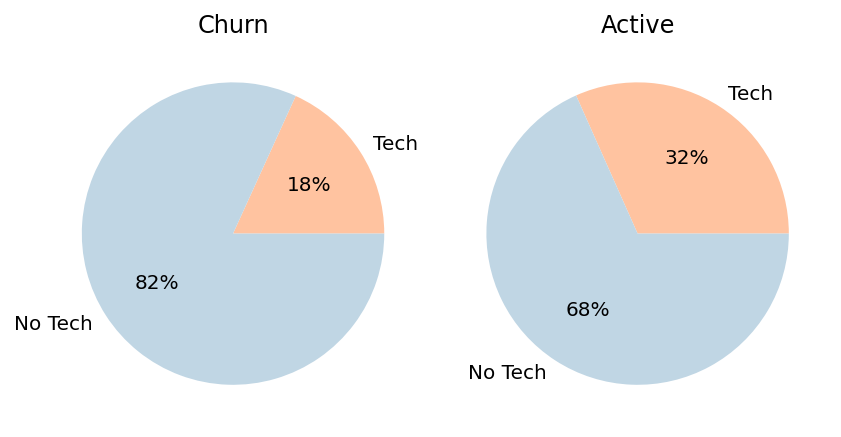

In [222]:
get_dbl_pies(train_df)

In [81]:
train_df.columns

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'signup_date', 'gender', 'partner', 'dependents', 'phone_service',
       'paperless_billing', 'churn', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'internet_service_type_DSL',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'contract_type_Month-to-month', 'contract_type_One year',
       'contract_type_Two year', 'payment_type_Bank transfer (automatic)',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

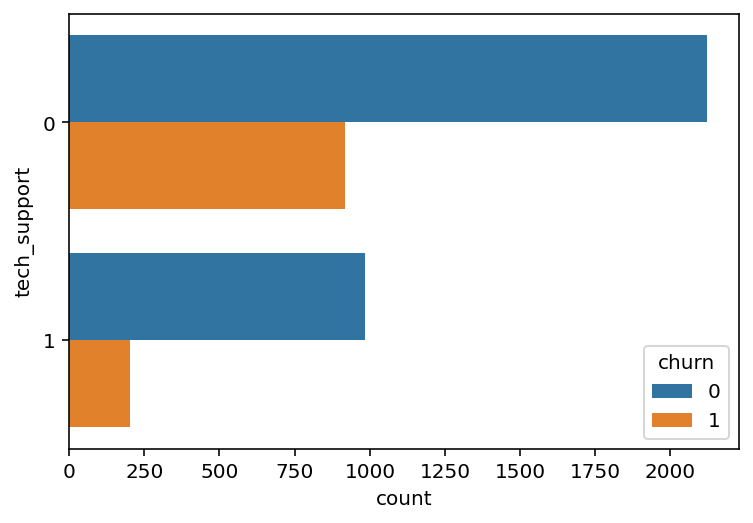

In [82]:
# count plot along y axis
sns.countplot(y ='tech_support', hue = "churn", data = train_df)
 
# Show the plot
plt.show()

* Those with Tech Support appear to be approximately 1/3 less likely to churn

In [227]:
combos = [
    ('monthly_charges', 'total_charges')
#    ('internet_service_type_DSL', 'internet_service_type_Fiber optic')
#    ('sepal_length', 'petal_length'),
#    ('sepal_width', 'petal_width'),
#    ('sepal_length', 'petal_width'),
#    ('sepal_width', 'petal_length')
]

In [228]:
x = combos[0][0]
y = combos[0][1]
def scatter_churn(x, y):
    for churn, subset in train_df.groupby('churn'):
        plt.scatter(subset[x], subset[y], label = churn)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

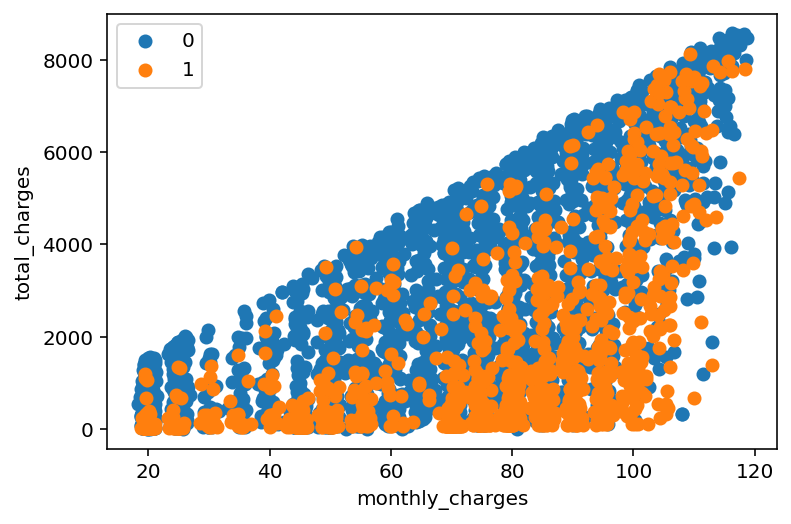

In [229]:
scatter_churn(x, y)

# ANALYSIS
<div class="alert alert-success">
* TARGET = CHURN

## What do I want to ask?
    
### 1. Is there a relationship between Tenure and Churn?
* ```Tenure``` has a significant ```relationship``` with ```Churn```.

### 1.1 Is the average Tenure of Active customers greater than the average tenure of churned customers?
* The ```average Tenure``` of ```Active``` customers is ```less than or equal``` to the ```average Tenure``` of customers that ```Churn```.
    
### 2. Is there a relationship between Monthly Charges and Churn?  
* ```Monthly Charges``` has a significant ```Relationship``` with ```Churn```.  
    
### 2.1 Are the average monthly charges of customers that Churn higher than the average monthly charges of Active customers?
* The ```average monthly charges``` of customers that ```Churn``` are ```less than or equal``` to the ```average monthly charges``` of ```Active``` customers.

### 3. Is there a relationship between tech support and Churn?**  
* ```Tech Support``` has **NO** significant ```Relationship``` with ```Churn```**
    
### 3.1 Do customers with tech support churn less than customers without tech support?**  
* answer

</div>

In [86]:
active = train_df.churn == 0
churn = train_df.churn == 1

In [87]:
active

0        True
1        True
2       False
3        True
4        True
        ...  
4220    False
4221     True
4222    False
4223     True
4224     True
Name: churn, Length: 4225, dtype: bool

In [88]:
churn

0       False
1       False
2        True
3       False
4       False
        ...  
4220     True
4221    False
4222     True
4223    False
4224    False
Name: churn, Length: 4225, dtype: bool

In [89]:
notech = train_df[train_df['tech_support']==0]
notech_churn = train_df[(train_df.tech_support==0) & (train_df.churn==1)]
notech_active = train_df[(train_df.tech_support==0) & (train_df.churn==0)]

In [90]:
notech.T

,0,2,3,4,5,7,8,9,13,15,...,4210,4211,4212,4214,4215,4217,4218,4220,4222,4223
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tenure,44,14,23,51,53,5,64,13,12,9,...,3,21,12,13,52,24,3,5,4,35
monthly_charges,109.8,100.55,20.15,87.55,100.3,70.05,81.05,84.6,49.85,20.25,...,20.55,20.35,25.25,19.55,94.6,66.3,20.85,90.8,70.2,55.25
total_charges,4860.35,1415.55,405.6,4475.9,5200.8,346.4,5135.35,1115.2,617.15,178.5,...,57.4,422.7,274.7,265.3,5025.8,1559.45,72.0,455.5,237.95,1924.1
signup_date,2018-05-21 18:07:34,2020-11-21 18:07:34,2020-02-21 18:07:34,2017-10-21 18:07:34,2017-08-21 18:07:34,2021-08-21 18:07:34,2016-09-21 18:07:34,2020-12-21 18:07:34,2021-01-21 18:07:34,2021-04-21 18:07:34,...,2021-10-21 18:07:34,2020-04-21 18:07:34,2021-01-21 18:07:34,2020-12-21 18:07:34,2017-09-21 18:07:34,2020-01-21 18:07:34,2021-10-21 18:07:34,2021-08-21 18:07:34,2021-09-21 18:07:34,2019-02-21 18:07:34
gender,0,1,1,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,1
partner,0,0,0,0,0,0,1,0,1,0,...,0,0,1,1,1,1,1,0,0,0
dependents,0,0,0,0,0,0,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0
phone_service,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
paperless_billing,1,1,0,0,1,1,0,1,1,0,...,1,1,0,0,0,0,0,1,1,0


In [91]:
notech_churn.T

,2,7,9,15,17,22,23,28,36,37,...,4184,4190,4192,4194,4197,4204,4205,4206,4220,4222
senior_citizen,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
tenure,14,5,13,9,11,35,25,61,51,7,...,31,10,24,51,16,53,1,13,5,4
monthly_charges,100.55,70.05,84.6,20.25,23.15,86.45,89.05,106.0,94.8,74.65,...,99.95,94.85,49.55,77.5,71.8,19.75,20.2,100.8,90.8,70.2
total_charges,1415.55,346.4,1115.2,178.5,245.2,3029.1,2177.45,6547.7,4837.6,544.55,...,3186.65,953.45,1210.4,3807.35,1167.8,1052.35,20.2,1308.1,455.5,237.95
signup_date,2020-11-21 18:07:34,2021-08-21 18:07:34,2020-12-21 18:07:34,2021-04-21 18:07:34,2021-02-21 18:07:34,2019-02-21 18:07:34,2019-12-21 18:07:34,2016-12-21 18:07:34,2017-10-21 18:07:34,2021-06-21 18:07:34,...,2019-06-21 18:07:34,2021-03-21 18:07:34,2020-01-21 18:07:34,2017-10-21 18:07:34,2020-09-21 18:07:34,2017-08-21 18:07:34,2021-12-21 18:07:34,2020-12-21 18:07:34,2021-08-21 18:07:34,2021-09-21 18:07:34
gender,1,1,0,1,1,0,1,1,1,1,...,0,0,1,0,1,1,1,0,0,1
partner,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
dependents,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
phone_service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
paperless_billing,1,1,1,0,0,1,1,1,1,0,...,1,1,1,1,1,0,1,1,1,1


In [92]:
notech_active.T

,0,3,4,5,8,13,16,18,21,25,...,4203,4207,4210,4211,4212,4214,4215,4217,4218,4223
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
tenure,44,23,51,53,64,12,27,34,2,72,...,9,72,3,21,12,13,52,24,3,35
monthly_charges,109.8,20.15,87.55,100.3,81.05,49.85,52.85,97.7,74.9,104.95,...,75.6,24.3,20.55,20.35,25.25,19.55,94.6,66.3,20.85,55.25
total_charges,4860.35,405.6,4475.9,5200.8,5135.35,617.15,1498.65,3410.0,136.05,7544.3,...,661.55,1778.7,57.4,422.7,274.7,265.3,5025.8,1559.45,72.0,1924.1
signup_date,2018-05-21 18:07:34,2020-02-21 18:07:34,2017-10-21 18:07:34,2017-08-21 18:07:34,2016-09-21 18:07:34,2021-01-21 18:07:34,2019-10-21 18:07:34,2019-03-21 18:07:34,2021-11-21 18:07:34,2016-01-21 18:07:34,...,2021-04-21 18:07:34,2016-01-21 18:07:34,2021-10-21 18:07:34,2020-04-21 18:07:34,2021-01-21 18:07:34,2020-12-21 18:07:34,2017-09-21 18:07:34,2020-01-21 18:07:34,2021-10-21 18:07:34,2019-02-21 18:07:34
gender,0,1,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
partner,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,1,1,1,1,1,0
dependents,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
phone_service,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
paperless_billing,1,0,0,1,0,1,0,1,1,1,...,0,0,1,1,0,0,0,0,0,0


In [93]:
tech = train_df[train_df['tech_support']==1]
tech_churn = train_df[(train_df.tech_support==1) & (train_df.churn==1)]
tech_active = train_df[(train_df.tech_support==1) & (train_df.churn==0)]

In [94]:
tech.T

,1,6,10,11,12,14,19,20,24,27,...,4199,4200,4202,4208,4209,4213,4216,4219,4221,4224
senior_citizen,0,0,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,1,1,0
tenure,14,69,36,28,49,35,38,54,17,71,...,6,71,66,7,34,64,30,57,52,10
monthly_charges,55.7,104.05,89.65,54.4,74.45,76.05,62.3,72.1,51.5,89.9,...,49.15,90.55,100.05,44.4,62.65,115.1,83.55,101.3,50.5,91.1
total_charges,795.15,7262.0,3348.1,1516.6,3721.9,2747.2,2354.8,3886.05,900.5,6457.15,...,270.8,6404.0,6871.9,265.8,2274.9,7334.05,2570.2,5779.6,2566.3,964.35
signup_date,2020-11-21 18:07:34,2016-04-21 18:07:34,2019-01-21 18:07:34,2019-09-21 18:07:34,2017-12-21 18:07:34,2019-02-21 18:07:34,2018-11-21 18:07:34,2017-07-21 18:07:34,2020-08-21 18:07:34,2016-02-21 18:07:34,...,2021-07-21 18:07:34,2016-02-21 18:07:34,2016-07-21 18:07:34,2021-06-21 18:07:34,2019-03-21 18:07:34,2016-09-21 18:07:34,2019-07-21 18:07:34,2017-04-21 18:07:34,2017-09-21 18:07:34,2021-03-21 18:07:34
gender,0,1,0,1,0,1,1,0,1,1,...,0,1,1,1,0,0,1,0,0,0
partner,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,1,0,1,0,0,0
dependents,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
phone_service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
paperless_billing,0,1,1,1,1,1,1,0,0,0,...,1,0,1,1,0,1,1,0,1,1


In [95]:
tech_churn.T

,6,19,24,33,58,61,76,78,89,119,...,4061,4101,4122,4128,4144,4147,4180,4199,4202,4209
senior_citizen,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
tenure,69,38,17,53,56,68,7,3,26,31,...,12,12,1,19,1,60,48,6,66,34
monthly_charges,104.05,62.3,51.5,60.05,111.95,113.15,34.5,63.6,60.05,78.45,...,80.85,56.65,60.1,100.95,44.65,106.0,117.45,49.15,100.05,62.65
total_charges,7262.0,2354.8,900.5,3229.65,6418.9,7856.0,279.25,155.65,1616.15,2435.15,...,866.45,654.85,60.1,1875.55,44.65,6441.4,5438.9,270.8,6871.9,2274.9
signup_date,2016-04-21 18:07:34,2018-11-21 18:07:34,2020-08-21 18:07:34,2017-08-21 18:07:34,2017-05-21 18:07:34,2016-05-21 18:07:34,2021-06-21 18:07:34,2021-10-21 18:07:34,2019-11-21 18:07:34,2019-06-21 18:07:34,...,2021-01-21 18:07:34,2021-01-21 18:07:34,2021-12-21 18:07:34,2020-06-21 18:07:34,2021-12-21 18:07:34,2017-01-21 18:07:34,2018-01-21 18:07:34,2021-07-21 18:07:34,2016-07-21 18:07:34,2019-03-21 18:07:34
gender,1,1,1,1,0,1,1,0,0,1,...,1,1,1,1,1,0,0,0,1,0
partner,0,0,0,1,0,1,1,0,1,0,...,1,0,0,1,0,0,1,1,1,1
dependents,0,0,0,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
phone_service,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,1
paperless_billing,1,1,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,1,1,0


In [96]:
tech_active.T

,1,10,11,12,14,20,27,32,35,38,...,4195,4196,4198,4200,4208,4213,4216,4219,4221,4224
senior_citizen,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
tenure,14,36,28,49,35,54,71,13,65,72,...,59,48,66,71,7,64,30,57,52,10
monthly_charges,55.7,89.65,54.4,74.45,76.05,72.1,89.9,50.55,84.2,53.65,...,65.5,73.85,90.55,90.55,44.4,115.1,83.55,101.3,50.5,91.1
total_charges,795.15,3348.1,1516.6,3721.9,2747.2,3886.05,6457.15,610.75,5324.5,3784.0,...,3801.3,3581.4,6130.95,6404.0,265.8,7334.05,2570.2,5779.6,2566.3,964.35
signup_date,2020-11-21 18:07:34,2019-01-21 18:07:34,2019-09-21 18:07:34,2017-12-21 18:07:34,2019-02-21 18:07:34,2017-07-21 18:07:34,2016-02-21 18:07:34,2020-12-21 18:07:34,2016-08-21 18:07:34,2016-01-21 18:07:34,...,2017-02-21 18:07:34,2018-01-21 18:07:34,2016-07-21 18:07:34,2016-02-21 18:07:34,2021-06-21 18:07:34,2016-09-21 18:07:34,2019-07-21 18:07:34,2017-04-21 18:07:34,2017-09-21 18:07:34,2021-03-21 18:07:34
gender,0,0,1,0,1,0,1,1,1,0,...,0,0,0,1,1,0,1,0,0,0
partner,0,0,0,0,1,0,1,0,1,1,...,1,0,1,1,0,0,1,0,0,0
dependents,0,0,1,0,1,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
phone_service,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,1,1,1,0,1
paperless_billing,0,1,1,1,1,0,0,1,1,0,...,0,1,1,0,1,1,1,0,1,1


<div class="alert alert-info">


**POSITIVE (+)** = insert Positive statement here  
**NEGATIVE (-)** = insert Negative statement here  

**RECALL**  
TP / (TP + FN)  
Use for less **Type II** errors when **FN** is worst outcome  
Maximize for **RECALL** if Cost of **FN** > Cost of **FP**  

**PRECISION**  
TP / (TP + FP)  
Use for less **Type I** errors when **FP** is worst outcome  
Maximize for **PRECISION** if Cost of **FP** > Cost of **FN**  

**ACCURACY**  
(TP + TN)/(FP+FN+TP+TN)  
total # prediction TRUE / total  
Maximize for **ACCURACY** if neither **RECALL** or **PRECISION** outweigh eachother  

* **Classification Confusion Matrix** (actual_col, prediction_row)(Positive_first, Negative_second)
|                     | actual Positive (+) | actual Negative(-) |
|---------------------|---------------------|--------------------|
|  pred Positive (+)  |     TP              |     FP (Type I)    |
|  pred Negative (-)  |     FN (Type II)    |     TN             |  

* <b>sklearn Confusion Matrix</b> (prediction_col, actual_row)(Negative_first, Positive_second)
|                     | pred Negative(-) | pred Positive (+) |
|---------------------|------------------|-------------------|
| actual Negative (-) |        TN        |    FP (Type I)    |
| actual Positive (+) |   FN (Type II)   |         TP        |  

**FP**: We **predicted** it was a **POSITIVE** when it was **actually** a **NEGATIVE**  
*    FP = We **FALSE**LY predicted it was **POSITIVE**  
* False = Our prediction was False, it was actually the opposite of our prediction  
* Oops... **TYPE I** error!  

**FN**: We **predicted** it was a **NEGATIVE** when it was **actually** a **POSITIVE**  
*    FN = We **FALSE**LY predicted it was **NEGATIVE**  
* False = Our prediction was False, it was actually the opposite of our prediction  
* Oops... **TYPE II** error!  

**TP**: We **predicted** it was a **POSITIVE** and it was **actually** a **POSITIVE**  
*   TP = We **TRUE**LY predicted it was **POSITIVE**  
* True = Our prediction was True, it was actually the same as our prediction  

**TN**: We **predicted** it was a **NEGATIVE** and it was **actually** a **NEGATIVE**  
*   TN = We **TRUE**LY predicted it was **NEGATIVE**  
* True = Our prediction was True, it was actually the same as our prediction  

</div>

## 1. Is there a relationship between Tenure and Churn
* ```Tenure``` has a significant ```relationship``` with ```Churn```.


**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (tenure, churn)**  


* One Sample or Two Samples?\
 **two_sample (tenure, churn)**  


* Continuous or Discreat?\
 **Discreat (churn_encoded) vs Continuous (tenure) = T-Test**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\.  
 **$H_{0}$: Tenure does **NOT** have a significant ```relationship``` with Churn**\.   
```train_df.tenure ``` != ```train_df.churn```  
 
 
* $𝐻_𝑎$: What am I trying to prove\.  
 **$H_{a}$: Tenure has a significant ```relationship``` with Churn**\.   
```train_df.tenure ``` == ```train_df.churn```

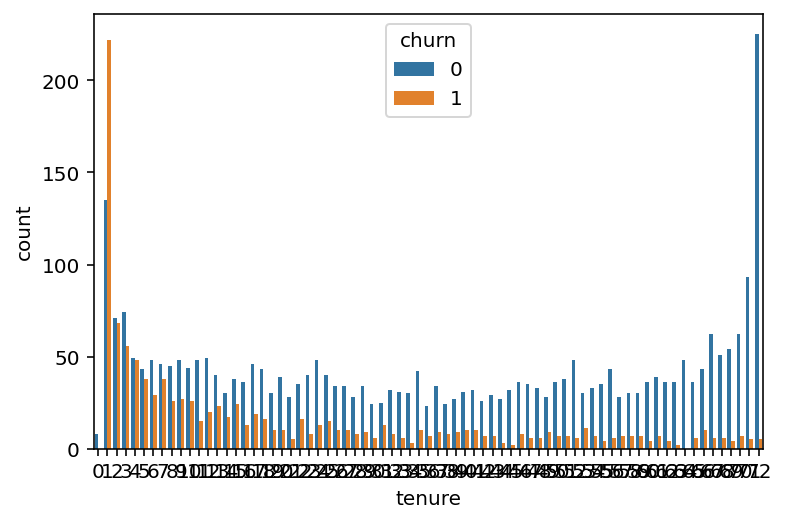

In [194]:
# count plot on two categorical variables
sns.countplot(x ='tenure', hue = 'churn', data = train_df)#, palette = "Set2")
 
# Show the plot
plt.show()

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [97]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

train_df.tenure.count(), train_df.churn.count()

(4225, 4225)

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [98]:
t_stat, p_val = stats.levene(train_df.tenure, train_df.churn)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train_df.tenure, train_df.churn, equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')
else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train_df.tenure, train_df.churn, equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: 84.51491671655458
p-value: 0.0


In [99]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


Tenure has a ```relationship``` with Churn

## 1.1 Is the average Tenure of Active customers greater than the average Tenure of Churned customers?
* The ```average Tenure``` of ```Active``` customers is ```less than or equal``` to the ```average Tenure``` of customers that ```Churn```.

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **one_tail (active_tenure.mean > churn_tenure.mean)**  


* One Sample or Two Samples?\
 **two_sample (active_tenure.mean > churn_tenure.mean)**  


* Continuous or Discreat?\
 **Continuous (active_tenure) vs Continuous (churn_tenure) = Pearson's R**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove  
* $H_{0}$: The average Tenure of Active customers is ```less than or equal``` to the average Tenure of customers that Churn  
* ```train_df.active_tenure.mean``` <= ```train_df.churn_tenure.mean```  


* $𝐻_𝑎$: What am I trying to prove  
* $H_{a}$: The average Tenure of Active customers is ```greater than``` the average Tenure of customers that Churn  
* ```train_df.active_tenure.mean ``` > ```train_df.churn_tenure.mean```

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [100]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

train_df.groupby(active).tenure.count(), 
train_df.groupby(churn).tenure.count()

churn
False    3104
True     1121
Name: tenure, dtype: int64

In [101]:
train_df.tenure.count()

4225

# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [102]:
r, p_val = stats.pearsonr(train_df.groupby(active).tenure.mean(),
                      train_df.groupby(churn).tenure.mean())
r, p_val

(-1.0, 1.0)

In [103]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


The ```average Tenure``` of ```Active``` customers is ```less than or equal``` to the ```average Tenure``` of customers that ```Churn```.

## 2. Is there a relationship between monthly_charges and Churn?
* ```Monthly Charges``` has a significant ```Relationship``` with ```Churn```.  

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (monthly_charges, churn_encoded)**  


* One Sample or Two Samples?\
 **two_sample (monthly_charges, churn_encoded)**  


* Continuous or Discreat?\
 **Discreat (churn_encoded) vs Continuous (monthly_charges) = T-Test**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\. 
**$H_{0}$: Monthly Charges does **NOT** have a significant ```Relationship``` with Churn**\.   
```train_df.monthly_charges.mean``` != ```train_df.churn_encoded.mean```  


* $𝐻_𝑎$: What am I trying to prove\. 
**$H_{a}$: Monthly Charges has a significant ```Relationship``` with Churn**  
```train_df.monthly_charges.mean``` == ```train_df.churn_encoded.mean```

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [104]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

train_df.monthly_charges.count(), train_df.churn.count()

(4225, 4225)

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [105]:
t_stat, p_val = stats.levene(train_df.monthly_charges, train_df.churn)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train_df.monthly_charges, 
                                    train_df.churn, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train_df.monthly_charges, 
                                    train_df.churn, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: 137.62095082786794
p-value: 0.0


In [106]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


```Monthly Charges``` has a significant ```Relationship``` with ```Churn```

## 2.1 Are the average monthly charges of customers that Churn higher than the average monthly charges of Active customers?
* Average monthly charges of customers that Churn are ```less than or equal``` to the average monthly charges of Active customers

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (churn_monthly_charges > active_monthly_charges)**  


* One Sample or Two Samples?\
 **two_sample (churn_monthly_charges > active_monthly_charges)**  


* Continuous or Discreat?\
 **Continuous (churn_monthly_charges) vs Continuous (active_monthly_charges) = Pearson's R**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\. 
**$H_{0}$: Average monthly charges of customers that Churn are ```less than or equal``` to the average monthly charges of Active customers**   
```train_df.churn_monthly_charges.mean ``` <= ```train_df.active_monthly_charges.mean```  


* $𝐻_𝑎$: What am I trying to prove\. 
**$H_{a}$: Average monthly charges of customers that Churn are ```greater than``` the average monthly charges of Active customers**  
```train_df.churn_monthly_charges.mean ``` > ```train_df.active_monthly_charges.mean```

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [107]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

train_df.groupby(churn).monthly_charges.count(), 
train_df.groupby(active).monthly_charges.count()

churn
False    1121
True     3104
Name: monthly_charges, dtype: int64

In [108]:
train_df.monthly_charges.count()

4225

# Pearson's R
**Compute test statistic and probability (r & p_val)**

In [109]:
r, p_val = stats.pearsonr(train_df.groupby(churn).monthly_charges.mean(), 
                          train_df.groupby(active).monthly_charges.mean())
                          
r, p_val

(-1.0, 1.0)

In [110]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


```Average monthly charges``` of customers that ```Churn``` are ```less than or equal``` to the ```average monthly charges``` of ```Active``` customers

## 3. Is there a difference between tech support and Churn?
```Tech Support``` has a significant ```Relationhip``` with ```Churn```

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **two_tail (tech_support, churn)**  


* One Sample or Two Samples?\
 **two_sample (tech_support, churn)**  


* Continuous or Discreat?\
 **Discreat (tech_support) vs Discreat (churn) = $Chi^2$**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\. 
**$H_{0}$: Tech Support does **NOT** have a significant ```Relationship``` with Churn  
```train_df.tech_support ``` != ```train_df.churn```


* $𝐻_𝑎$: What am I trying to prove\. 
* $H_{a}$: Tech Support has a significant ```Relationhip``` with Churn  
```train_df.tech_support ``` == ```train_df.churn```

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [111]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

train_df.tech_support.count(), train_df.churn.count()

(4225, 4225)

# $Chi^2$
**Compute test statistic and probability (Observed, Expected, degf, p-value)**

In [112]:
observed = pd.crosstab(train_df.tech_support, train_df.churn)
observed

churn,0,1
tech_support,,
0,2121,917
1,983,204


In [113]:
chi2, p_val, degf, expected = stats.chi2_contingency(observed)

In [114]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'Chi^2 = {chi2:.4f}')
print(f'p_val = {p_val}')

Observed
[[2121  917]
 [ 983  204]]

Expected
[[2231  806]
 [ 872  314]]

----
Chi^2 = 73.3124
p_val = 1.1067117362588518e-17


In [115]:
if p_val < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


```Tech Support``` has a significant ```Relationhip``` with ```Churn```

## 3.1 Is the average of customer Churn without Tech Support greater than the average of customer Churn with Tech Support?
* The ```average Churn``` of customers ```without Tech Support``` is ```greater than``` the ```average Churn``` of customers ```with Tech Support```

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **one_tail (active_tech_support.mean > churn_tech_support.mean)**  


* One Sample or Two Samples?\
 **two_sample (active_tech_support.mean > churn_tech_support.mean)**  


* Continuous or Discreat?\
 **Continuous (active_tech_support) vs Continuous (churn_tech_support) = Pearson's R**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\. 
* $H_{0}$: The average Churn of customers without Tech Support is ```less than or equal``` to the average Churn of customers with Tech Support   
* ```train_df.churn_notech_support.mean``` <= ```train_df.churn_tech_support.mean```


* $𝐻_𝑎$: What am I trying to prove\. 
* $H_{a}$: The average Churn of customers without Tech Support is ```greater than``` the average Churn of customers with Tech Support  
* ```train_df.churn_notech_support.mean``` > ```train_df.churn_tech_support.mean```

# Pearson's R
**Compute test statistic and probability (r & p_val)**

In [116]:
r, p_val = stats.pearsonr(notech_churn.mean(),
                          tech_churn.mean())
                          
r, p_val

/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/1464523283.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  r, p_val = stats.pearsonr(notech_churn.mean(),
/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/1464523283.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  tech_churn.mean())


(0.9997452266654486, 1.0910351223597938e-42)

In [117]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


The average Churn of customers without Tech Support is greater than the average Churn of customers with Tech Support

## 3.2 Is the average of customer Churn without Tech Support greater than the average of Active customers without tech support?
* The ```average``` of customers ```without Tech Support that Churn``` is ```greater than``` the ```average of Active customers with Tech Support```

**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?\
 **one_tail (notech_churn, tech_active)**  


* One Sample or Two Samples?\
 **two_sample (notech_churn, tech_active)**  


* Continuous or Discreat?\
 **Continuous (notech_churn) vs Continuous (tech_active) = Pearson's R**  
     * T-Test = ```Discreat``` vs ```Continuous```
     * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)
     * $Chi^2$ = ```Discreat``` vs ```Discreat```


* $𝐻_0$: The opposite of what I am trying to prove\. 
* $H_{0}$: The average of customers without Tech Support that Churn is ```less than or equal``` to the average of Active customers with Tech Support  
* ```train_df.churn_notech_support.mean``` <= ```train_df.active_tech_support.mean```


* $𝐻_𝑎$: What am I trying to prove\. 
* $H_{a}$: The average of customers without Tech Support that Churn is ```greater than``` the average of Active customers with Tech Support  
* ```train_df.churn_notech_support.mean``` > ```train_df.active_tech_support.mean```

# Pearson's R
**Compute test statistic and probability (r & p_val)**

In [118]:
r, p_val = stats.pearsonr(notech_churn.mean(),
                          tech_active.mean())
                          
r, p_val

/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/3986839836.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  r, p_val = stats.pearsonr(notech_churn.mean(),
/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/3986839836.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  tech_active.mean())


(0.9994348983574662, 2.3002685214962374e-38)

In [119]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


The ```average``` of customers ```without Tech Support that Churn``` is ```greater than``` the ```average of Active customers with Tech Support```

## OVERALL TAKEAWAYS OF CHURN AND TECH SUPPORT

<div class="alert alert-info">
<b>30% of all customers without tech support churn</b>
</div>

<div class="alert alert-info">
<b>82% of all churn is attributed to not having tech support</b>
</div>

### BREAKOUT ALL TECH SUPPORT NUMBERS

In [120]:
# Total count for Tech Support
train_df.tech_support.count()

4225

In [121]:
# Count of True and False for Tech Support
train_df.tech_support.value_counts()

0    3038
1    1187
Name: tech_support, dtype: int64

In [122]:
# how many customers have notech support
notech.tenure.count()

3038

In [123]:
# How many customers churn that have notech support
notech_churn.tenure.count()

917

In [124]:
# How many active customers have notech support
notech_active.tenure.count()

2121

In [125]:
# How many customers have tech support
tech.tenure.count()

1187

In [126]:
# How many customers churn that have tech support
tech_churn.tenure.count()

204

In [127]:
# How many active customers have tech support
tech_active.tenure.count()

983

<div class="alert alert-info">
<b>30% of all customers without tech support churn</b>
</div>

In [128]:
# notech_churn / notech_all = percent of notech churn
# 917 / 3038 = 30%
notech_churn.tenure.count() / notech.tenure.count()

0.30184331797235026

<div class="alert alert-info">
<b>Only 17% of customers with tech support churn</b>
</div>

In [129]:
# tech_churn / tech_all = percent of tech churn
# 204 / 1178 = 17%
tech_churn.tenure.count() / tech.tenure.count()

0.17186183656276327

### Percent of overall churn

<div class="alert alert-info">
<b>82% of all churn is attributed to not having tech support</b>
</div>

In [130]:
# notech_churn / churn_all = percent of overal churn that is notech
# 917 / 1121 = 82%
notech_churn.tenure.count() / train_df[churn==True].tenure.count()

0.8180196253345228

<div class="alert alert-info">
<b>Only 18% of all churn can be attributed to customers with tech support</b>
</div>

In [131]:
# tech_churn / churn_all = percent of overal churn that is tech
# 204 / 1121 = 18%
tech_churn.tenure.count() / train_df[churn==True].tenure.count()

0.18198037466547726

### BREAKOUT ALL CHURN NUMBERS

In [132]:
# Total count of Active and Churn
train_df.churn.count()

4225

In [133]:
# Count of True and False for Churn
train_df.churn.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [134]:
# Count of all Churn
train_df[churn==True].tenure.count()

1121

In [135]:
# Count of all Active
train_df[active==True].tenure.count()

3104

# MODELING

<div class="alert alert-success">
</div>

In [136]:
train_df.T

,0,1,2,3,4,5,6,7,8,9,...,4215,4216,4217,4218,4219,4220,4221,4222,4223,4224
senior_citizen,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
tenure,44,14,14,23,51,53,69,5,64,13,...,52,30,24,3,57,5,52,4,35,10
monthly_charges,109.8,55.7,100.55,20.15,87.55,100.3,104.05,70.05,81.05,84.6,...,94.6,83.55,66.3,20.85,101.3,90.8,50.5,70.2,55.25,91.1
total_charges,4860.35,795.15,1415.55,405.6,4475.9,5200.8,7262.0,346.4,5135.35,1115.2,...,5025.8,2570.2,1559.45,72.0,5779.6,455.5,2566.3,237.95,1924.1,964.35
signup_date,2018-05-21 18:07:34,2020-11-21 18:07:34,2020-11-21 18:07:34,2020-02-21 18:07:34,2017-10-21 18:07:34,2017-08-21 18:07:34,2016-04-21 18:07:34,2021-08-21 18:07:34,2016-09-21 18:07:34,2020-12-21 18:07:34,...,2017-09-21 18:07:34,2019-07-21 18:07:34,2020-01-21 18:07:34,2021-10-21 18:07:34,2017-04-21 18:07:34,2021-08-21 18:07:34,2017-09-21 18:07:34,2021-09-21 18:07:34,2019-02-21 18:07:34,2021-03-21 18:07:34
gender,0,0,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,0,1,1,0
partner,0,0,0,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,0,0,0
dependents,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
phone_service,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
paperless_billing,1,0,1,0,0,1,1,1,0,1,...,0,1,0,0,0,1,1,1,0,1


In [137]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   senior_citizen                          4225 non-null   int64         
 1   tenure                                  4225 non-null   int64         
 2   monthly_charges                         4225 non-null   float64       
 3   total_charges                           4225 non-null   float64       
 4   signup_date                             4225 non-null   datetime64[ns]
 5   gender                                  4225 non-null   int64         
 6   partner                                 4225 non-null   int64         
 7   dependents                              4225 non-null   int64         
 8   phone_service                           4225 non-null   int64         
 9   paperless_billing                       4225 non-nul

# Baseline

In [138]:
# Preprocessing for modeling (drop signup_date; incompatable dtype for fit)
X_train = train_df.drop(columns=['churn','signup_date'])
y_train = train_df.churn

X_validate = validate_df.drop(columns=['churn','signup_date'])
y_validate = validate_df.churn

X_test = test_df.drop(columns=['churn','signup_date'])
y_test = test_df.churn

In [139]:
X_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,gender,partner,dependents,phone_service,paperless_billing,multiple_lines,...,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,44,109.80,4860.35,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0
1,0,14,55.70,795.15,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,14,100.55,1415.55,1,0,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
3,0,23,20.15,405.60,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,51,87.55,4475.90,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [140]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [141]:
X_train.shape, X_validate.shape, X_test.shape

((4225, 26), (1409, 26), (1409, 26))

In [142]:
y_train.shape, y_validate.shape, y_test.shape

((4225,), (1409,), (1409,))

In [143]:
y_train.value_counts()

0    3104
1    1121
Name: churn, dtype: int64

In [144]:
y_train.mode()

0    0
Name: churn, dtype: int64

In [145]:
# The mode of the target (0 = 329) is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
baseline_prediction = (y_train == 0)

# baseline accuracy
baseline_accuracy = baseline_prediction.mean()
print(f"Baseline Accuracy: {round(baseline_accuracy, 2)}")

Baseline Accuracy: 0.73


# Decision Tree
<div class="alert alert-warning">
</div>

# Fit and Transform

In [146]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=1992)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_preds = tree1.predict(X_train)

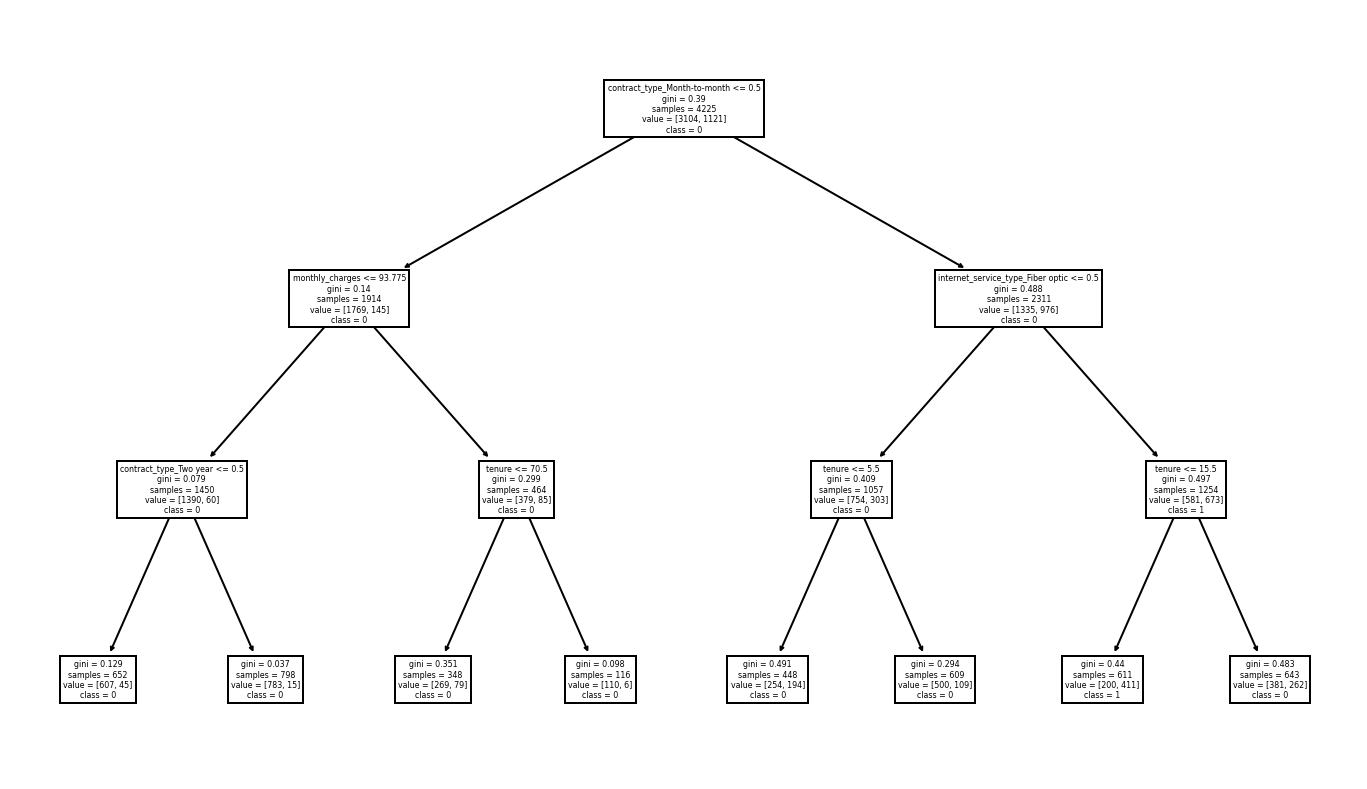

In [147]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names = X_train.columns, class_names = ['0','1'])
plt.show()

## Evaluate Performance

In [148]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


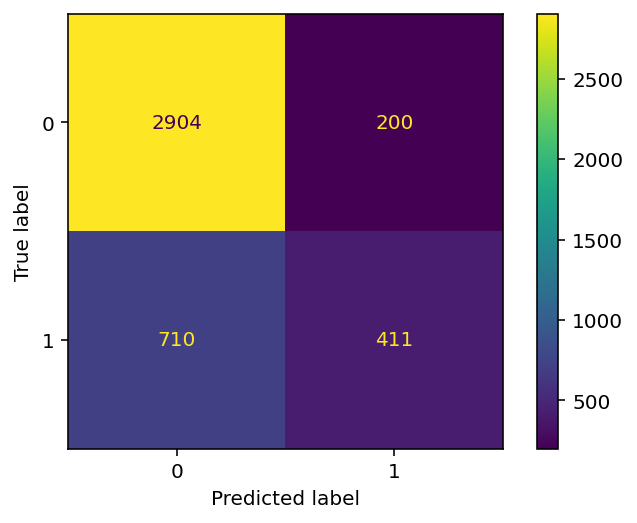

In [149]:
plot_confusion_matrix(tree1, X_train, y_train)

In [150]:
ee.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[2904  200]
 [ 710  411]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3104
           1       0.67      0.37      0.47      1121

    accuracy                           0.78      4225
   macro avg       0.74      0.65      0.67      4225
weighted avg       0.77      0.78      0.76      4225



In [151]:
# Produce the classification report 
# comparing the actual y values and this model's predicted y values
report = classification_report(y_train, y_preds, output_dict = True)
print("Tree1 with max_depth(3)")
pd.DataFrame(report)

Tree1 with max_depth(3)


,0,1,accuracy,macro avg,weighted avg
precision,0.803542,0.672668,0.784615,0.738105,0.768818
recall,0.935567,0.366637,0.784615,0.651102,0.784615
f1-score,0.864543,0.474596,0.784615,0.669569,0.761080
support,3104.000000,1121.000000,0.784615,4225.000000,4225.000000


## Compute Accuracy

In [152]:
TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
TN, FP, FN, TP

(2904, 200, 710, 411)

In [153]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 3104
Positive Cases: 1121
0    3104
1    1121
Name: churn, dtype: int64


In [154]:
ee.print_class_metrics(y_train, y_preds)

Accuracy: 0.7846153846153846
True Positive Rate: 0.3666369313113292
False Positive Rate: 0.06443298969072164
True Negative Rate: 0.9355670103092784
False Negative Rate: 0.6333630686886709
Precision: 0.6726677577741408
Recall: 0.3666369313113292
F1 Score: 0.4745958429561201
Support (0): 1121
Support (1): 3104


In [155]:
# Let's get loopy
# This will try max_depth at each value in the range
for i in range(1, 31):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=1992)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_preds = tree.predict(X_train)

    # Produce the classification report 
    # on the actual y values and this model's predicted y values
    report = classification_report(y_train, 
                                   y_preds, 
                                   output_dict = True)

    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0       1  accuracy    macro avg  weighted avg
precision     0.734675     0.0  0.734675     0.367337      0.539747
recall        1.000000     0.0  0.734675     0.500000      0.734675
f1-score      0.847046     0.0  0.734675     0.423523      0.622303
support    3104.000000  1121.0  0.734675  4225.000000   4225.000000

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.849209     0.536683   0.75645     0.692946      0.766288
recall        0.812822     0.600357   0.75645     0.706589      0.756450
f1-score      0.830617     0.566737   0.75645     0.698677      0.760603
support    3104.000000  1121.000000   0.75645  4225.000000   4225.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.803542     0.672668  0.784615     0.738105      0.768818
recall        0.935567     0.366637  0.784615     0.651102      0.784615

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with max depth of 7
                     0            1  accuracy    macro avg  weighted avg
precision     0.883041     0.663470  0.823432     0.773255      0.824783
recall        0.875644     0.678858  0.823432     0.777251      0.823432
f1-score      0.879327     0.671076  0.823432     0.775201      0.824073
support    3104.000000  1121.000000  0.823432  4225.000000   4225.000000

Tree with max depth of 8
                     0            1  accuracy    macro avg  weighted avg
precision     0.898046     0.699567  0.843787     0.798806      0.845384
recall        0.888209     0.720785  0.843787     0.804497      0.843787
f1-score      0.893100     0.710018  0.843787     0.801559      0.844524
support    3104.000000  1121.000000  0.843787  4225.000000   4225.000000

Tree with max depth of 9
                     0            1  accuracy    macro avg  weighted avg
precision     0.891372     0.768694  0.862249     0.830033      0.858822
recall        0.925258     0.687779  0.862249  

max_depth of 24 produces the highest results

*  Accuracy of 0.99787
* Precision of 0.997109
*    Recall of 100%
*        F1 of 0.998552

In [156]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 31):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=1992)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metrics_df = pd.DataFrame(metrics)
metrics_df["difference"] = metrics_df.train_accuracy - metrics_df.validate_accuracy
metrics_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.734675,0.734564,0.000111
1,2,0.756450,0.772889,-0.016439
2,3,0.784615,0.796309,-0.011694
3,4,0.786982,0.799858,-0.012876
4,5,0.799763,0.789922,0.009841
5,6,0.811124,0.784244,0.026880
6,7,0.823432,0.787083,0.036349
7,8,0.843787,0.787083,0.056704
8,9,0.862249,0.787793,0.074456
9,10,0.880473,0.765082,0.115392


max_depth seems to max out at 24 with an Accuracy of:

| max_depth | train_accuracy | validate_accuracy | difference |
|-----------|----------------|-------------------|------------|
| 24 | 0.997870 | 0.732434 | 0.265435 |

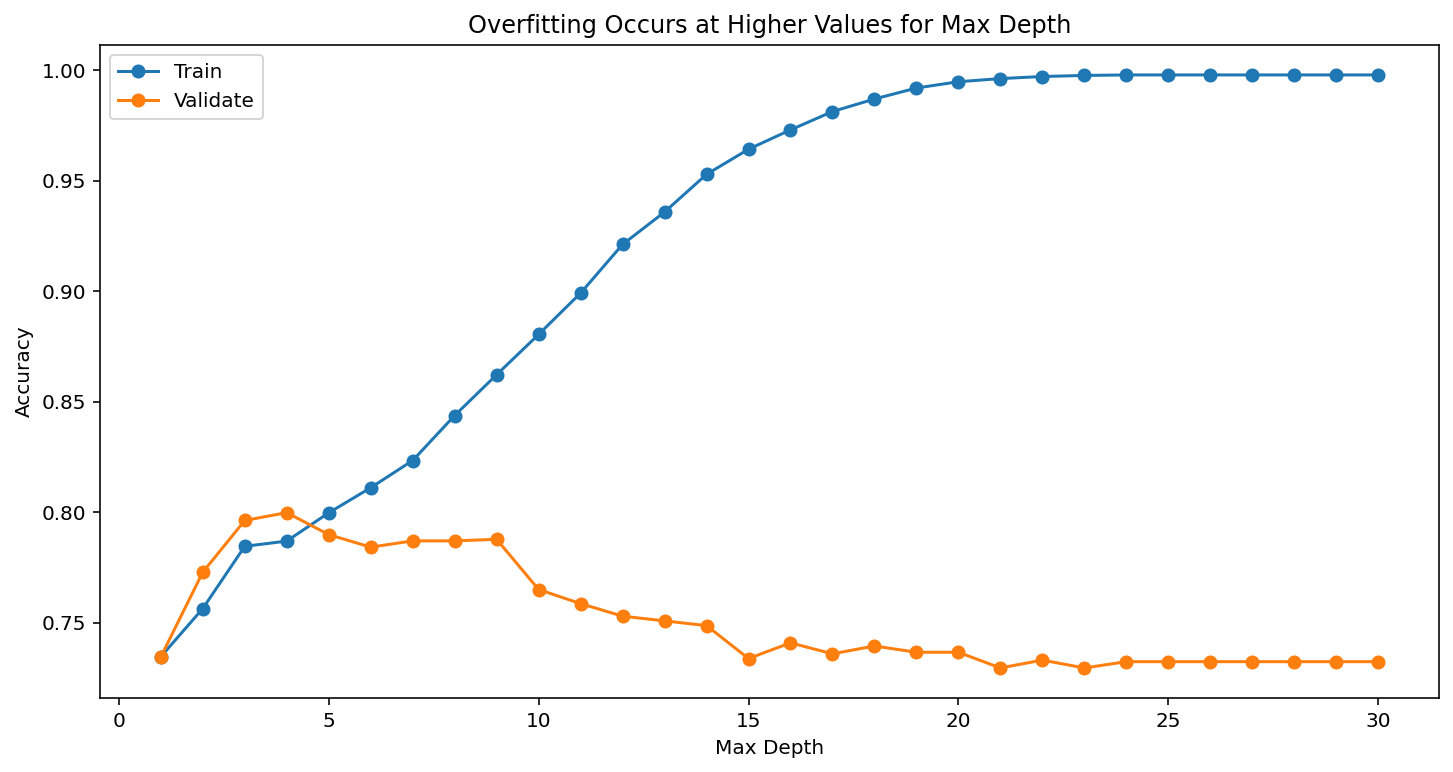

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(metrics_df.max_depth, metrics_df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(metrics_df.max_depth, metrics_df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [158]:
metrics_df[metrics_df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
3,4,0.786982,0.799858,-0.012876
2,3,0.784615,0.796309,-0.011694
4,5,0.799763,0.789922,0.009841
8,9,0.862249,0.787793,0.074456
6,7,0.823432,0.787083,0.036349
7,8,0.843787,0.787083,0.056704
5,6,0.811124,0.784244,0.026880
1,2,0.756450,0.772889,-0.016439
0,1,0.734675,0.734564,0.000111


<div class="alert alert-info">

**```max_depth```** of **4** has the highest validate accuracy with the lowest difference between validate and train.

|max_depth|	train_accuracy|	validate_accuracy|	difference|
|---------|---------------|------------------|------------|
|4|	0.786982|	0.799858|	-0.012876|

</div>

# Random Forest
<div class="alert alert-warning">
</div>

In [159]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [160]:
# create DF from Series to ensure proper operation of RF evaluation
y_train = pd.DataFrame(y_train)

In [161]:
y_train.head()

,churn
0,0
1,0
2,1
3,0
4,0


## Fit and Transform

In [162]:
rf = RandomForestClassifier(min_samples_leaf=1,
                            max_depth=10,
                            random_state=1992)

In [163]:
rf.fit(X_train, y_train)

/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=1992)

In [164]:
y_preds = rf.predict(X_train)

## Evaluate Performance

In [165]:
rf.score(X_train, y_train)

0.8953846153846153

**Create a classificaiton report**


**Precision:** $\frac{TP}{(TP + FP)}$

**Recall:** $\frac{TP}{(TP + FN)}$

**F1-Score:** A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.  

F1 $\in [0, 1]$

F1-score = harmonic mean = $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

**Support:** number of occurrences of each class. 

In [166]:
ee.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[2970  134]
 [ 308  813]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3104
           1       0.86      0.73      0.79      1121

    accuracy                           0.90      4225
   macro avg       0.88      0.84      0.86      4225
weighted avg       0.89      0.90      0.89      4225



In [167]:
cm = confusion_matrix(y_train, y_preds)
cr = classification_report(y_train, y_preds)

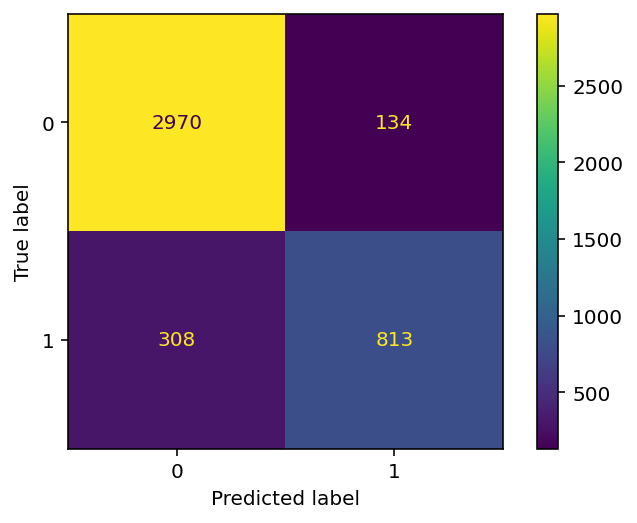

In [168]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = rf.classes_)
disp.plot()
plt.show()

In [169]:
ee.print_class_metrics(y_train, y_preds)

Accuracy: 0.8953846153846153
True Positive Rate: 0.7252453166815344
False Positive Rate: 0.043170103092783504
True Negative Rate: 0.9568298969072165
False Negative Rate: 0.27475468331846564
Precision: 0.8585005279831045
Recall: 0.7252453166815344
F1 Score: 0.7862669245647969
Support (0): 1121
Support (1): 3104


In [170]:
# Must ensure y_train is read in as DataFrame

model_prediction = y_train.copy()

for i in range(1, 6):
    for j in range(10, 5, -1):
        rf = RandomForestClassifier(min_samples_leaf=i,
                                    max_depth=j,
                                    random_state=1992)
        
        rf.fit(X_train, y_train)
        
        curr_preds = rf.predict(X_train)
        
        model_prediction[f'msl_{i}_md_{j}'] = curr_preds

/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/2181903635.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/2181903635.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/2181903635.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/var/folders/x8/x12zllv954v785j2tdhggqrr0000gn/T/ipykernel_20496/2181903635.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

In [171]:
model_prediction

,churn,msl_1_md_10,msl_1_md_9,msl_1_md_8,msl_1_md_7,msl_1_md_6,msl_2_md_10,msl_2_md_9,msl_2_md_8,msl_2_md_7,...,msl_4_md_10,msl_4_md_9,msl_4_md_8,msl_4_md_7,msl_4_md_6,msl_5_md_10,msl_5_md_9,msl_5_md_8,msl_5_md_7,msl_5_md_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4222,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# Must ensure y_train is read in as DataFrame

actuals = model_prediction.churn
preds = model_prediction.drop(columns = 'churn')

for column in preds.columns:
    
    accuracy = (actuals == preds[column]).mean()
    
    print(f'{column} accuracy: {accuracy}')

msl_1_md_10 accuracy: 0.8953846153846153
msl_1_md_9 accuracy: 0.869112426035503
msl_1_md_8 accuracy: 0.845207100591716
msl_1_md_7 accuracy: 0.8267455621301775
msl_1_md_6 accuracy: 0.8097041420118343
msl_2_md_10 accuracy: 0.8771597633136095
msl_2_md_9 accuracy: 0.861301775147929
msl_2_md_8 accuracy: 0.8421301775147929
msl_2_md_7 accuracy: 0.8255621301775148
msl_2_md_6 accuracy: 0.8063905325443786
msl_3_md_10 accuracy: 0.8662721893491124
msl_3_md_9 accuracy: 0.8532544378698225
msl_3_md_8 accuracy: 0.8383431952662722
msl_3_md_7 accuracy: 0.8231952662721893
msl_3_md_6 accuracy: 0.8068639053254438
msl_4_md_10 accuracy: 0.8563313609467456
msl_4_md_9 accuracy: 0.845207100591716
msl_4_md_8 accuracy: 0.8357396449704142
msl_4_md_7 accuracy: 0.8196449704142011
msl_4_md_6 accuracy: 0.8089940828402367
msl_5_md_10 accuracy: 0.8506508875739645
msl_5_md_9 accuracy: 0.845207100591716
msl_5_md_8 accuracy: 0.8352662721893491
msl_5_md_7 accuracy: 0.8201183431952662
msl_5_md_6 accuracy: 0.8066272189349113


<div class="alert alert-info">

minimum_sample_leaf of 1 and max_depth of 10 provide the highest Accuracy

msl_1_md_10 accuracy: 0.8953846153846153

</div>

## Validate Performaance

In [173]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.81


# KNN
<div class="alert alert-warning">
</div>

## Fit and Transform

In [174]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Evaluate Performance

In [175]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.83


In [176]:
ee.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[2865  239]
 [ 480  641]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3104
           1       0.73      0.57      0.64      1121

    accuracy                           0.83      4225
   macro avg       0.79      0.75      0.76      4225
weighted avg       0.82      0.83      0.82      4225



### Set k for 10

In [177]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [178]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.80


In [180]:
ee.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[2946  158]
 [ 683  438]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      3104
           1       0.73      0.39      0.51      1121

    accuracy                           0.80      4225
   macro avg       0.77      0.67      0.69      4225
weighted avg       0.79      0.80      0.78      4225



In [181]:
ee.print_class_metrics(y_train, y_preds)

Accuracy: 0.8009467455621302
True Positive Rate: 0.39072256913470116
False Positive Rate: 0.0509020618556701
True Negative Rate: 0.9490979381443299
False Negative Rate: 0.6092774308652988
Precision: 0.7348993288590604
Recall: 0.39072256913470116
F1 Score: 0.5101921956901573
Support (0): 1121
Support (1): 3104


### Set k for 20

In [182]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [183]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [184]:
ee.print_confusion_matrix(y_train, y_preds)

sklearn Confusion Matrix: (prediction_col, actual_row)
                          (Negative_first, Positive_second)
[[2933  171]
 [ 724  397]]
                       :--------------------------------------:
                       | pred Negative(-) | pred Positive (+) |
 :---------------------:------------------:-------------------:
 | actual Negative (-) |        TN        |    FP (Type I)    |
 :---------------------:------------------:-------------------:
 | actual Positive (+) |   FN (Type II)   |         TP        |
 :---------------------:------------------:-------------------:

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      3104
           1       0.70      0.35      0.47      1121

    accuracy                           0.79      4225
   macro avg       0.75      0.65      0.67      4225
weighted avg       0.77      0.79      0.76      4225



In [185]:
ee.print_class_metrics(y_train, y_preds)

Accuracy: 0.7881656804733728
True Positive Rate: 0.3541480820695807
False Positive Rate: 0.05509020618556701
True Negative Rate: 0.944909793814433
False Negative Rate: 0.6458519179304193
Precision: 0.698943661971831
Recall: 0.3541480820695807
F1 Score: 0.47010065127294254
Support (0): 1121
Support (1): 3104


### Loop and Set k for to 5, 10, 20 (append to dictionary and DF for display and comparison

In [189]:
preds_dict = {'model': [],
              'accuracy': [],
              'true_positive_rate': [],
              'false_positive_rate': [],
              'true_negative_rate': [],
              'false_negative_rate': [],
              'precision': [],
              'recall': [],
              'f1_score': [],
              'support_0': [],
              'support_1': []}

for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_train)
    
    TN, FP, FN, TP = confusion_matrix(y_train, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    preds_dict['model'].append(f'knn_n_{n}')
    preds_dict['accuracy'].append(accuracy)
    preds_dict['true_positive_rate'].append(true_positive_rate)
    preds_dict['false_positive_rate'].append(false_positive_rate)
    preds_dict['true_negative_rate'].append(true_negative_rate)
    preds_dict['false_negative_rate'].append(false_negative_rate)
    preds_dict['precision'].append(precision)
    preds_dict['recall'].append(recall)
    preds_dict['f1_score'].append(f1_score)
    preds_dict['support_0'].append(support_pos)
    preds_dict['support_1'].append(support_neg)
    
train_preds_df = pd.DataFrame(preds_dict).T
train_preds_df.columns = train_preds_df.iloc[0]
train_preds_df = train_preds_df.drop(train_preds_df.index[0])
train_preds_df

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model,knn_n_5,knn_n_10,knn_n_20
accuracy,0.829822,0.800947,0.788166
true_positive_rate,0.571811,0.390723,0.354148
false_positive_rate,0.076997,0.050902,0.05509
true_negative_rate,0.923003,0.949098,0.94491
false_negative_rate,0.428189,0.609277,0.645852
precision,0.728409,0.734899,0.698944
recall,0.571811,0.390723,0.354148
f1_score,0.64068,0.510192,0.470101
support_0,1121,1121,1121
support_1,3104,3104,3104


## Validate Performance

In [190]:
preds_dict = {'model': [],
             'accuracy': [],
             'true_positive_rate': [],
             'false_positive_rate': [],
             'true_negative_rate': [],
             'false_negative_rate': [],
             'precision': [],
             'recall': [],
             'f1_score': [],
             'support_0': [],
             'support_1': []}

for n in [5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors = n)
    
    knn.fit(X_train, y_train)
    
    y_preds = knn.predict(X_validate)
    
    TN, FP, FN, TP = confusion_matrix(y_validate, y_preds).ravel()
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL
    true_positive_rate = TP/(TP+FN)
    false_positive_rate = FP/(FP+TN)
    true_negative_rate = TN/(TN+FP)
    false_negative_rate = FN/(FN+TP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    support_pos = TP + FN
    support_neg = FP + TN
    
    preds_dict['model'].append(f'knn_n_{n}')
    preds_dict['accuracy'].append(accuracy)
    preds_dict['true_positive_rate'].append(true_positive_rate)
    preds_dict['false_positive_rate'].append(false_positive_rate)
    preds_dict['true_negative_rate'].append(true_negative_rate)
    preds_dict['false_negative_rate'].append(false_negative_rate)
    preds_dict['precision'].append(precision)
    preds_dict['recall'].append(recall)
    preds_dict['f1_score'].append(f1_score)
    preds_dict['support_0'].append(support_pos)
    preds_dict['support_1'].append(support_neg)
    
train_preds_df = pd.DataFrame(preds_dict).T
train_preds_df.columns = train_preds_df.iloc[0]
train_preds_df = train_preds_df.drop(train_preds_df.index[0])
train_preds_df

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model,knn_n_5,knn_n_10,knn_n_20
accuracy,0.76863,0.786373,0.7956
true_positive_rate,0.449198,0.342246,0.363636
false_positive_rate,0.115942,0.05314,0.048309
true_negative_rate,0.884058,0.94686,0.951691
false_negative_rate,0.550802,0.657754,0.636364
precision,0.583333,0.699454,0.731183
recall,0.449198,0.342246,0.363636
f1_score,0.507553,0.459605,0.485714
support_0,374,374,374
support_1,1035,1035,1035


In [191]:
# Get percentage of True/False for Target Feature
y_train.value_counts(normalize=True)

churn
0        0.734675
1        0.265325
dtype: float64